# internal note v 3.3 Aug-20, 2017

In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
import matplotlib.mlab as mlab
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


# pp-SRC c.m. analysis

In [2]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight'] # ,'Mott','DipoleFF2'
data_allPmiss_noPrecFid , data300Pmiss600_noPrecFid = dict() , dict()
data_allPmiss_PrecFid , data300Pmiss600_PrecFid = dict() , dict()

for target in ['C12','Al27','Fe56','Pb208']:
    data_allPmiss_PrecFid[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target, columns=columns )
    data300Pmiss600_PrecFid[target] = data_allPmiss_PrecFid[target][data_allPmiss_PrecFid[target]['Pmiss3Mag']<0.6]

In [3]:
cm_parameters = dict()
cm_parameters_with_correction = dict()
for Fiducials in ["PrecFiducials","NoPrecFiducials"]:
    cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_'+Fiducials+'_dataCMparameters.csv')
    cm_pars['sigma_x_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_x_unweighted']) - np.square(0.02))
    cm_pars['sigma_x_before_acc_corr_err'] = cm_pars['sigma_xErr_unweighted']
    cm_pars['sigma_y_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_y_unweighted']) - np.square(0.02))
    cm_pars['sigma_y_before_acc_corr_err'] = cm_pars['sigma_yErr_unweighted']
    cm_pars['sigma_t_before_acc_corr'] = 0.5*(cm_pars['sigma_x_unweighted']+cm_pars['sigma_y_unweighted'])
    cm_pars['sigma_t_before_acc_corr_err'] = 0.5*np.sqrt(np.square(cm_pars['sigma_x_before_acc_corr_err'])+np.square(cm_pars['sigma_y_before_acc_corr_err']))
    cm_parameters[Fiducials] = cm_pars
    cm_parameters_with_correction[Fiducials] = cm_pars

## cm_parameters['PrecFiducials']

In [4]:
cm_parameters['PrecFiducials'][['sigma_x_unweighted','sigma_xErr_unweighted','sigma_y_unweighted','sigma_yErr_unweighted','sigma_z_unweighted','sigma_zErr_unweighted','chi2red_x_unweighted']]

sigma_x_unweighted  sigma_xErr_unweighted  sigma_y_unweighted  \
0            0.158378               0.006865            0.161638   
1            0.181341               0.013666            0.166910   
2            0.178723               0.008388            0.185658   
3            0.196040               0.020634            0.164304   

   sigma_yErr_unweighted  sigma_z_unweighted  sigma_zErr_unweighted  \
0               0.007007            0.147251               0.006384   
1               0.012570            0.141058               0.010629   
2               0.008706            0.150658               0.007069   
3               0.017300            0.169545               0.017832   

   chi2red_x_unweighted  
0              0.602767  
1              1.058674  
2              0.471936  
3              0.847317

In [5]:
simulation_results = dict()
for Fiducials in ["PrecFiducials"]:
    for target in ['C','Al','Fe','Pb']:#{
            test_name = "sims_300Pmiss600_"+target+"_"+Fiducials
            simulation_results[test_name] = pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results_300Pmiss600/"+test_name+'.csv')
            simulation_results[test_name].fillna(-1,inplace=True)
            print len(simulation_results[test_name]),'events in ',test_name

24300 events in  sims_300Pmiss600_C_PrecFiducials
24196 events in  sims_300Pmiss600_Al_PrecFiducials
24150 events in  sims_300Pmiss600_Fe_PrecFiducials
19921 events in  sims_300Pmiss600_Pb_PrecFiducials


In [6]:
Fiducials = "PrecFiducials"
for extraname in ["_mean75MeVc_sigma50MeVc","_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured"]:
    for target in ['C','Al','Fe','Pb']:#{
        test_name = "sims_300Pmiss600_"+target+"_"+Fiducials+extraname
        simulation_results[test_name] = pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results_300Pmiss600/"+test_name+'.csv')
        simulation_results[test_name].fillna(-1,inplace=True)
        print len(simulation_results[test_name]),'events in ',test_name

12150 events in  sims_300Pmiss600_C_PrecFiducials_mean75MeVc_sigma50MeVc
12150 events in  sims_300Pmiss600_Al_PrecFiducials_mean75MeVc_sigma50MeVc
12150 events in  sims_300Pmiss600_Fe_PrecFiducials_mean75MeVc_sigma50MeVc
12150 events in  sims_300Pmiss600_Pb_PrecFiducials_mean75MeVc_sigma50MeVc
12150 events in  sims_300Pmiss600_C_PrecFiducials_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured
12150 events in  sims_300Pmiss600_Al_PrecFiducials_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured
12150 events in  sims_300Pmiss600_Fe_PrecFiducials_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured
12150 events in  sims_300Pmiss600_Pb_PrecFiducials_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured


In [7]:
def find_x_poly(poly,y0,xmin=0,xmax=0.3):
    p = np.poly1d(poly)
    roots = (p - y0).roots
    for root in roots:
        if xmin<root and root<xmax:
            x_poly = root
    return x_poly

In [8]:
def plot_cm_direction(simulations_results=None
                      ,Fiducials='PrecFiducials'
                      ,extraname=""
                      ,ax=None,A=12
                      ,poly_degree=3
                      ,confidence_interval = 0.68
                      ,direction='x',colors=['blue','royalblue'],s=50
                      ,debug=0):

    gen,rec = simulations_results['gen_Sigma_t'],simulations_results['rec_sigma_'+direction]
    plt.scatter(gen,rec,color=colors[1],label='generated vs. reconstructed',s=s)
    if debug:  print "plt.scatter()"
    # fit a polynomial of order 2
    popt,cov = np.polyfit( gen,rec , poly_degree , cov=True)
    perr = np.sqrt(np.diag(cov))
    if debug: print "popt:",popt,"\nperr:",perr
    
    x = np.linspace(np.min(ax.get_xlim()),np.max(ax.get_xlim()),1000)
    poly = np.poly1d(popt)
    ax.plot(x,poly(x),'-',color='black',linewidth=2,label='best fit')    
    
    # Convert to percentile point of the normal distribution [https://en.wikipedia.org/wiki/Standard_score]
    pp = (1. + confidence_interval) / 2.
    # Convert to number of standard deviations.
    nstd = stats.norm.ppf(pp)
    
    # Add nstd standard deviations to parameters to obtain the upper confidence interval
    poly_up = np.poly1d(popt + nstd * perr)
    ax.plot(x,poly_up(x),'-',color='gray',linewidth=2)
    poly_dw = np.poly1d(popt - nstd * perr)
    ax.plot(x,poly_dw(x),'-',color='gray',linewidth=2)
    
    cm_pars = cm_parameters[Fiducials]    
    cm_pars_target = cm_pars[cm_pars['A']==A]
    index = cm_pars[cm_pars['A']==A].index
    # reconstructed \sigma in data
    if debug:  print cm_pars_target
    sigma_meas, sigma_meas_err = float(cm_pars_target['sigma_'+direction+'_before_acc_corr']), float(cm_pars_target['sigma_'+direction+'_before_acc_corr_err'])
    y =  np.ones(len(x)) * sigma_meas
    yErr =  np.ones(len(x)) * sigma_meas_err

    # corrected value
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    corr_value =  find_x_poly(poly , sigma_meas)
    label_corr = '$%.3f$'%(corr_value)
    plt.plot( np.linspace(np.min(ax.get_xlim()),corr_value,1000) , y , color=colors[1],label='measured: $%.3f\\pm%.3f$'%(sigma_meas, sigma_meas_err))
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 

    # only statistical uncertainty
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    x_poly_up_stat = find_x_poly(poly,sigma_meas+sigma_meas_err)
    x_poly_dw_stat = find_x_poly(poly,sigma_meas-sigma_meas_err)
    corr_val_up_err_stat = x_poly_up_stat - corr_value
    corr_val_dw_err_stat = corr_value - x_poly_dw_stat
    label_unc_stat = '$(^{+%.0f}_{-%.0f})_{stat.}$'%(1000*corr_val_up_err_stat,1000*corr_val_dw_err_stat)
    
    plt.plot( [x_poly_up_stat,x_poly_up_stat] , [np.min(ax.get_ylim()),sigma_meas+sigma_meas_err] , color='black' ,linestyle='--')
    plt.plot( [x_poly_dw_stat,x_poly_dw_stat] , [np.min(ax.get_ylim()),sigma_meas-sigma_meas_err] , color='black' ,linestyle='--' )
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 

    # systematical uncertainty
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    x_poly_up_sys = find_x_poly(poly_dw,sigma_meas+sigma_meas_err)
    x_poly_dw_sys = find_x_poly(poly_up,sigma_meas-sigma_meas_err)
    corr_val_up_err_sys = x_poly_up_sys - x_poly_up_stat
    corr_val_dw_err_sys = x_poly_dw_stat - x_poly_dw_sys
    label_unc_sys = '$(^{+%.0f}_{-%.0f})_{sys.}$'%(1000*corr_val_up_err_sys,1000*corr_val_dw_err_sys)



    if debug:  print "plt.plot( np.linspace(np.min(ax.get_xlim()),corr_value,1000)..."   
    # projection of the measured uncertainties
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_up_sys,1000) , y+yErr , color=colors[0],linestyle='-',alpha=0.35)
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_dw_sys,1000) , y-yErr , color=colors[0],linestyle='-',alpha=0.35)

    # projection of the systematical uncertainties
    plt.plot( [x_poly_up_sys,x_poly_up_sys] , [np.min(ax.get_ylim()),sigma_meas+sigma_meas_err] , color='grey' ,linestyle='-')
    plt.plot( [x_poly_dw_sys,x_poly_dw_sys] , [np.min(ax.get_ylim()),sigma_meas-sigma_meas_err] , color='grey' ,linestyle='-' )
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    if debug:  print "plugging",'sigma_'+direction+'_corrected'+extraname
    
    # corrected value
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    corr_val_up_err_tot = np.sqrt(np.square(corr_val_up_err_stat) + np.square(corr_val_up_err_sys))
    corr_val_dw_err_tot = np.sqrt(np.square(corr_val_dw_err_stat) + np.square(corr_val_dw_err_sys))
    
    plt.plot( [corr_value,corr_value] , [np.min(ax.get_ylim()),sigma_meas] , color=colors[0]
             ,label='corrected:'+label_corr+label_unc_stat+label_unc_sys)
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
        
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected'+extraname,corr_value)
    
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_up_err_stat'+extraname,corr_val_up_err_stat)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_dw_err_stat'+extraname,corr_val_dw_err_stat)
             
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_up_err_sys'+extraname,corr_val_up_err_sys)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_dw_err_sys'+extraname,corr_val_dw_err_sys)

    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_up_err_tot'+extraname,corr_val_up_err_tot)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_dw_err_tot'+extraname,corr_val_dw_err_tot)             
             
    set_axes(ax,'gen. $\\sigma$ [GeV/c]','rec. $\\sigma_'+direction+'$ [GeV/c]'    
             , xticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , yticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , do_add_grid=True 
             ,title = cm_pars_target['target'].to_string(index=False) + ', $'+direction+'-direction$ ('+Fiducials+')')

    ax.legend(loc='upper left',fontsize=20,scatterpoints=3,markerscale=2)
    ax.set_xlim(0,0.3);ax.set_ylim(0,0.3);
    return corr_value, corr_val_up_err_tot , corr_val_dw_err_tot

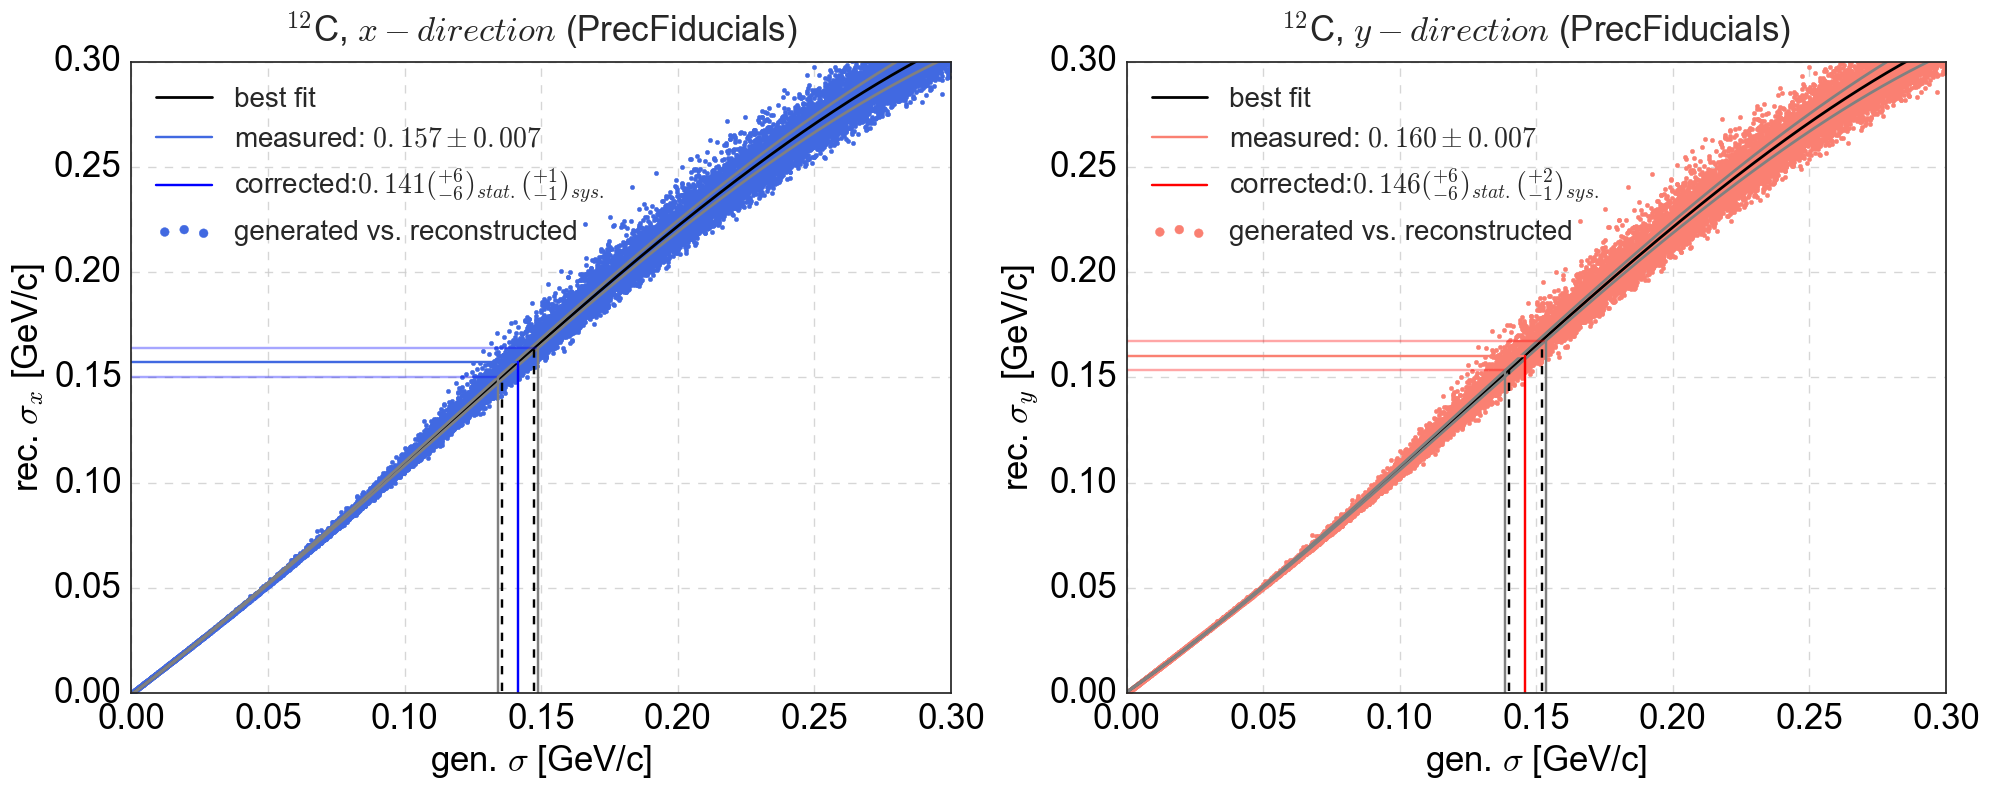

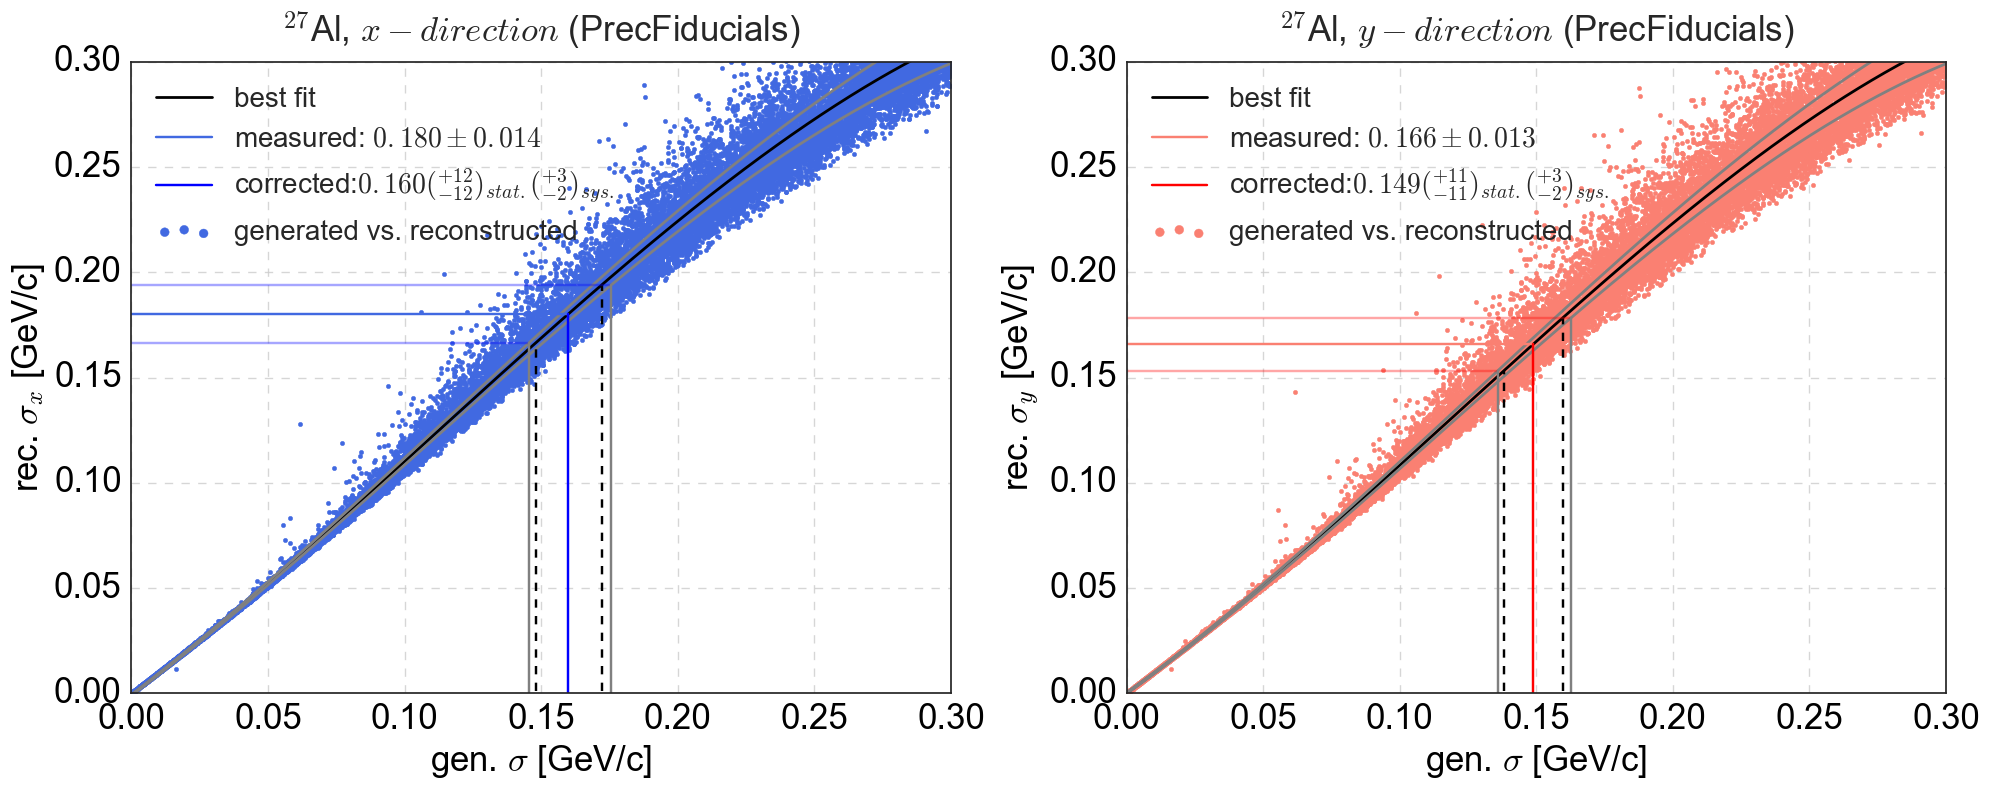

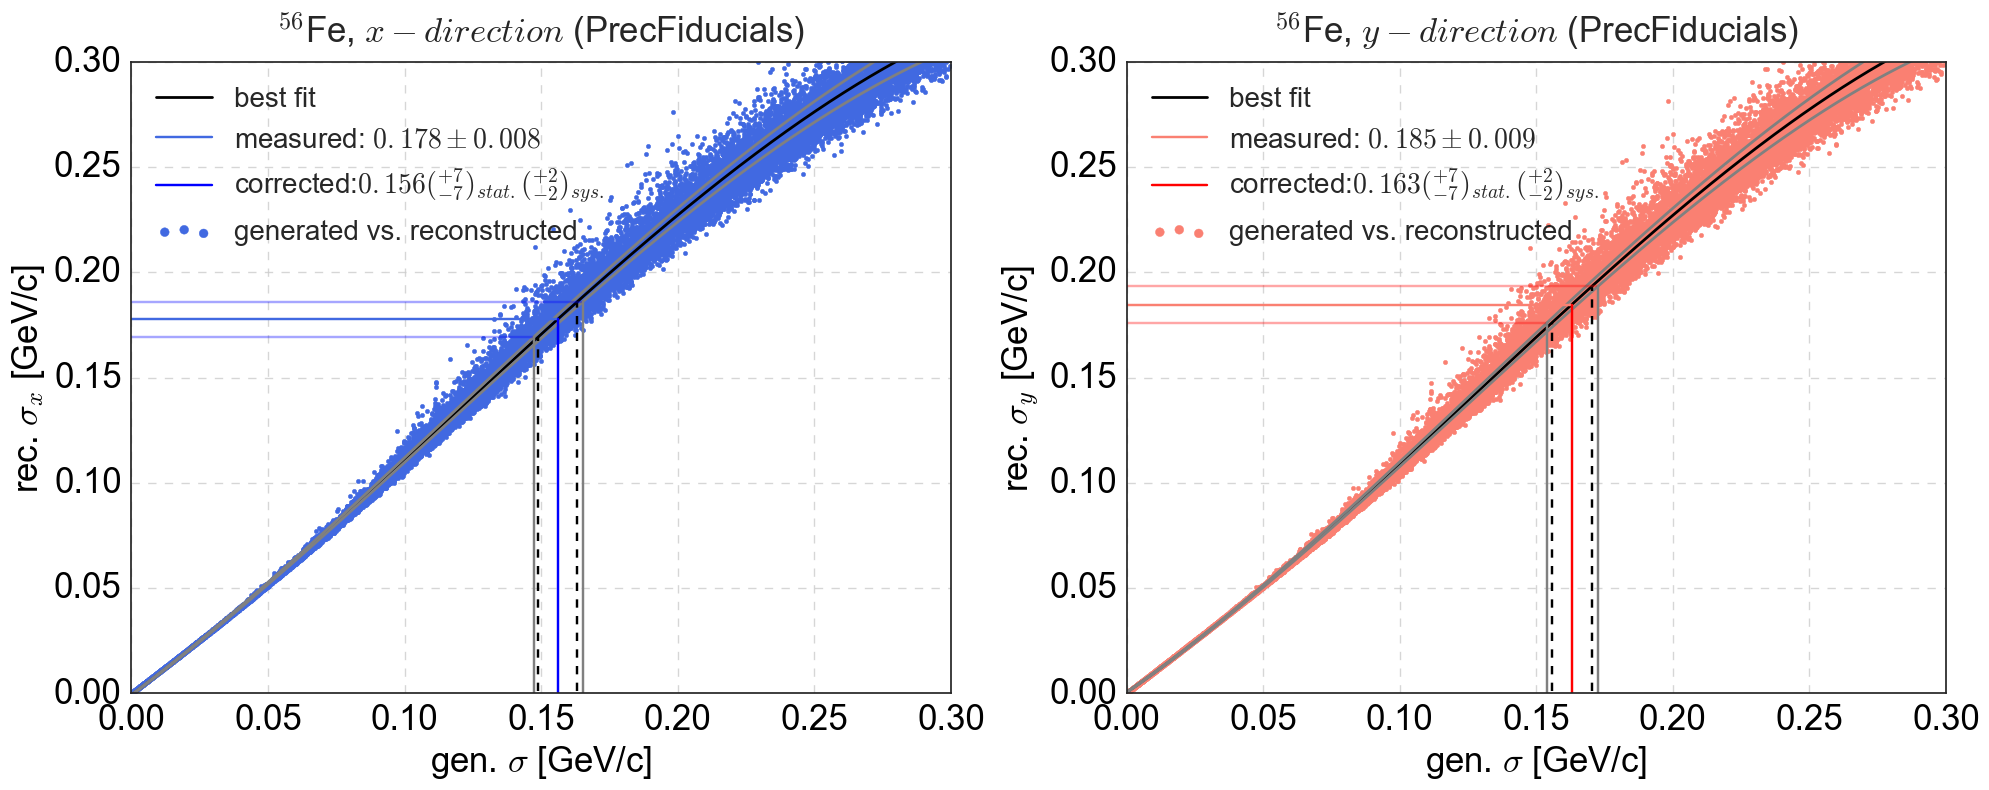

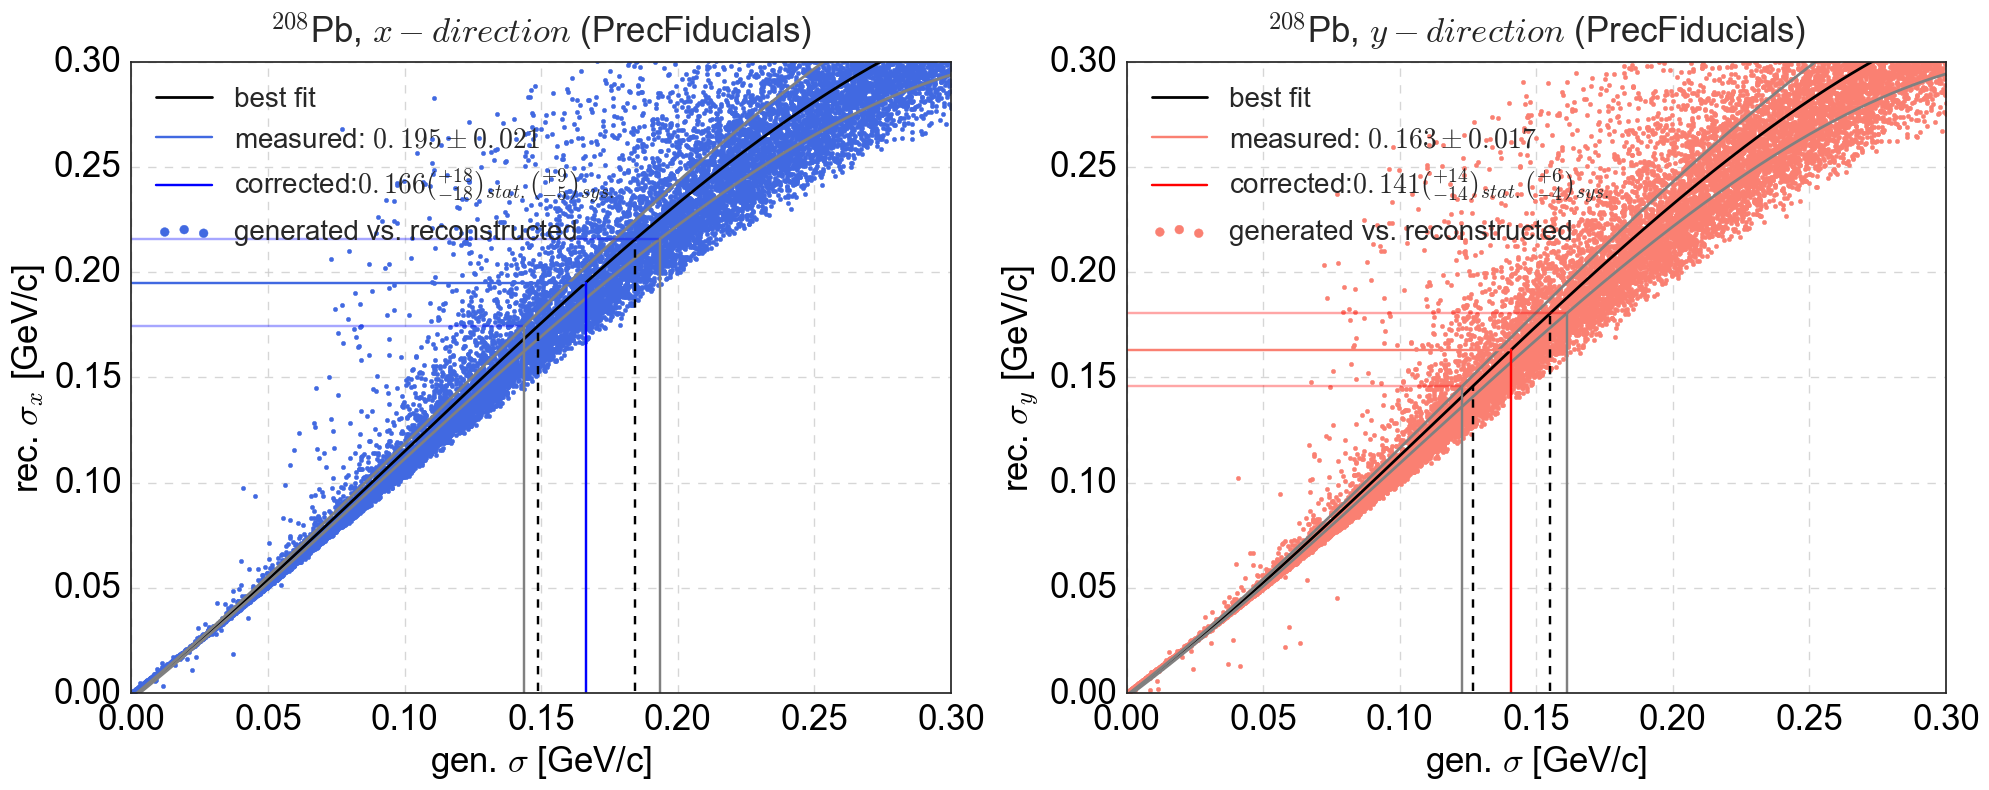

In [9]:
poly_degree = 3 # fit polynomial degree
confidence_interval = 0.68 # band around fit

for Fiducials in ["PrecFiducials"]:#,"NoPrecFiducials"]: 
    for A,target,Neep,Neepp in zip([12,27,56,208]
                                   ,['C','Al','Fe','Pb']
                                   ,[7598,2573,8558,2635]
                                   ,[266,88,227,45]
                       ):#{
#     for A,target,Neep,Neepp in zip([56,208],['Fe','Pb'],[8558,2635],[227,45]):#{
        test_name = "sims_300Pmiss600_"+target+"_"+Fiducials
        simulations_results=simulation_results[test_name]
        good_results = simulations_results[(simulations_results['gen_SigmaZ']>0)
                                           &(simulations_results['rec_sigma_x']>0)
                                           &(simulations_results['rec_sigma_y']>0)                                                                                    
                                           &(simulations_results['rec_sigma_z']>0)
                                           &(simulations_results['rec_mean_x']>-0.9)
                                           &(simulations_results['rec_mean_y']>-0.9)                                                                                   
                                           &(simulations_results['rec_mean_x']>-0.9)
#                                            &(simulations_results['Naccepted']>0.1*20*(Neep+Neepp))
#                                            &(simulations_results['gen_MeanZ']<0.3)
                                          ]
        fig=plt.figure(figsize=(20,8))
    
        ax=fig.add_subplot(1,2,1)    
        corr_sx = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials                                                           
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='x'                                                           
                                                           ,colors=['blue','royalblue']);

        ax=fig.add_subplot(1,2,2)    
        corr_sx = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials                                                                                                                                                                                 
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='y'                                                           
                                                           ,colors=['red','salmon']);                        
    
        plt.tight_layout()   

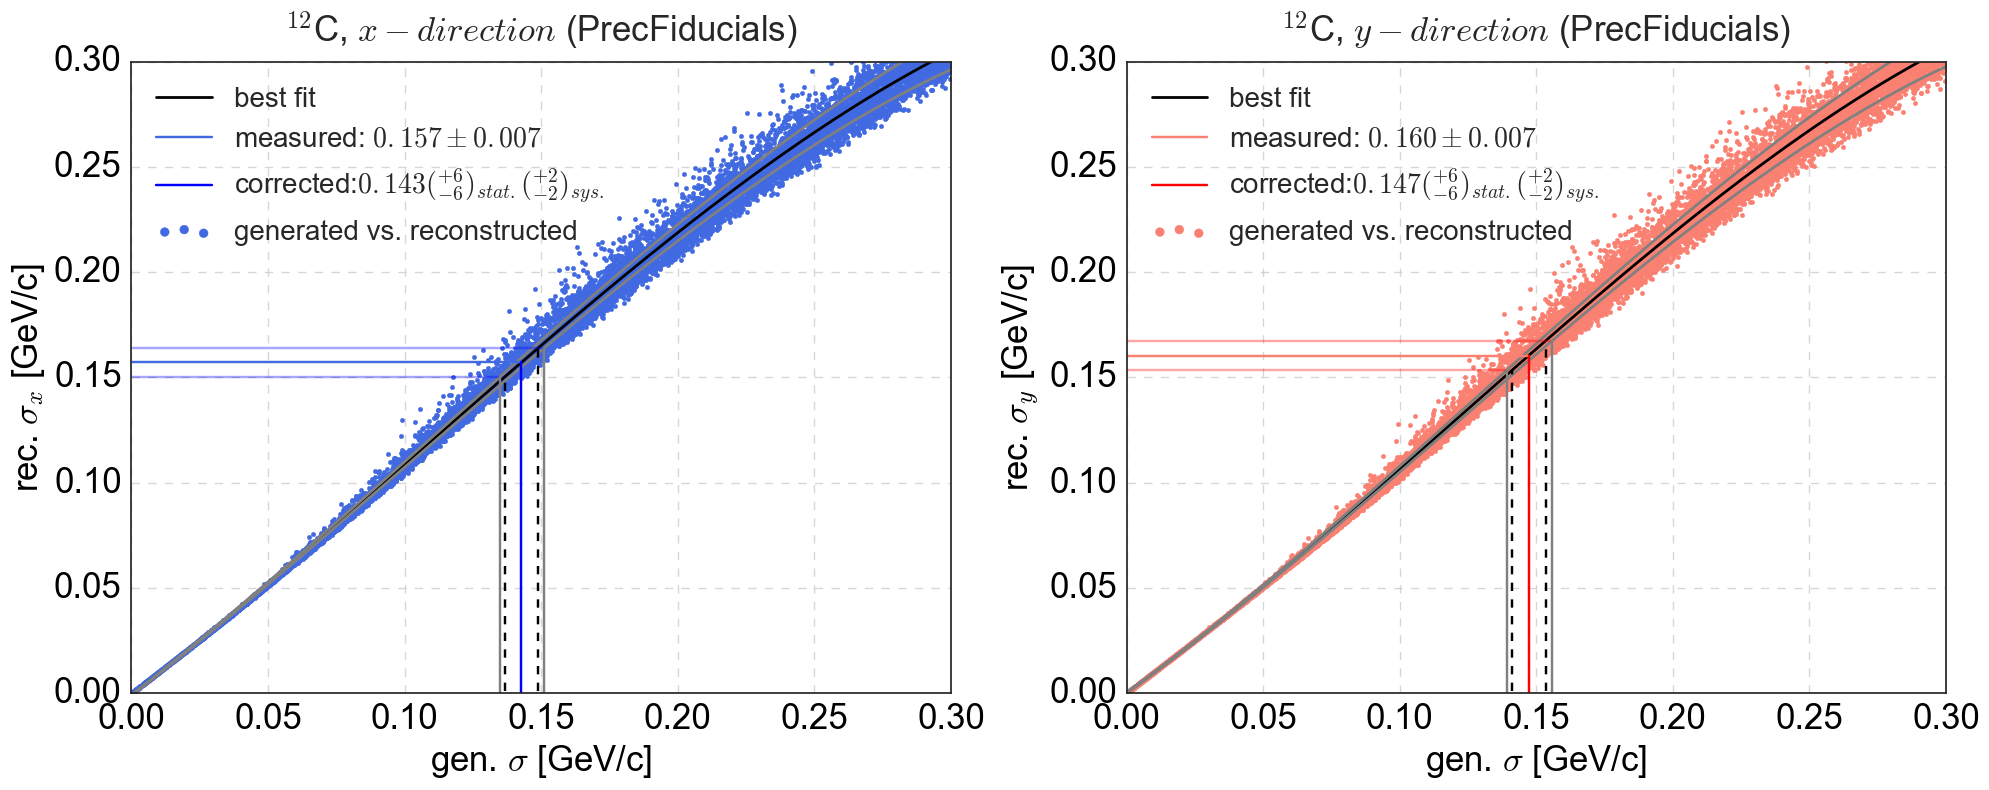

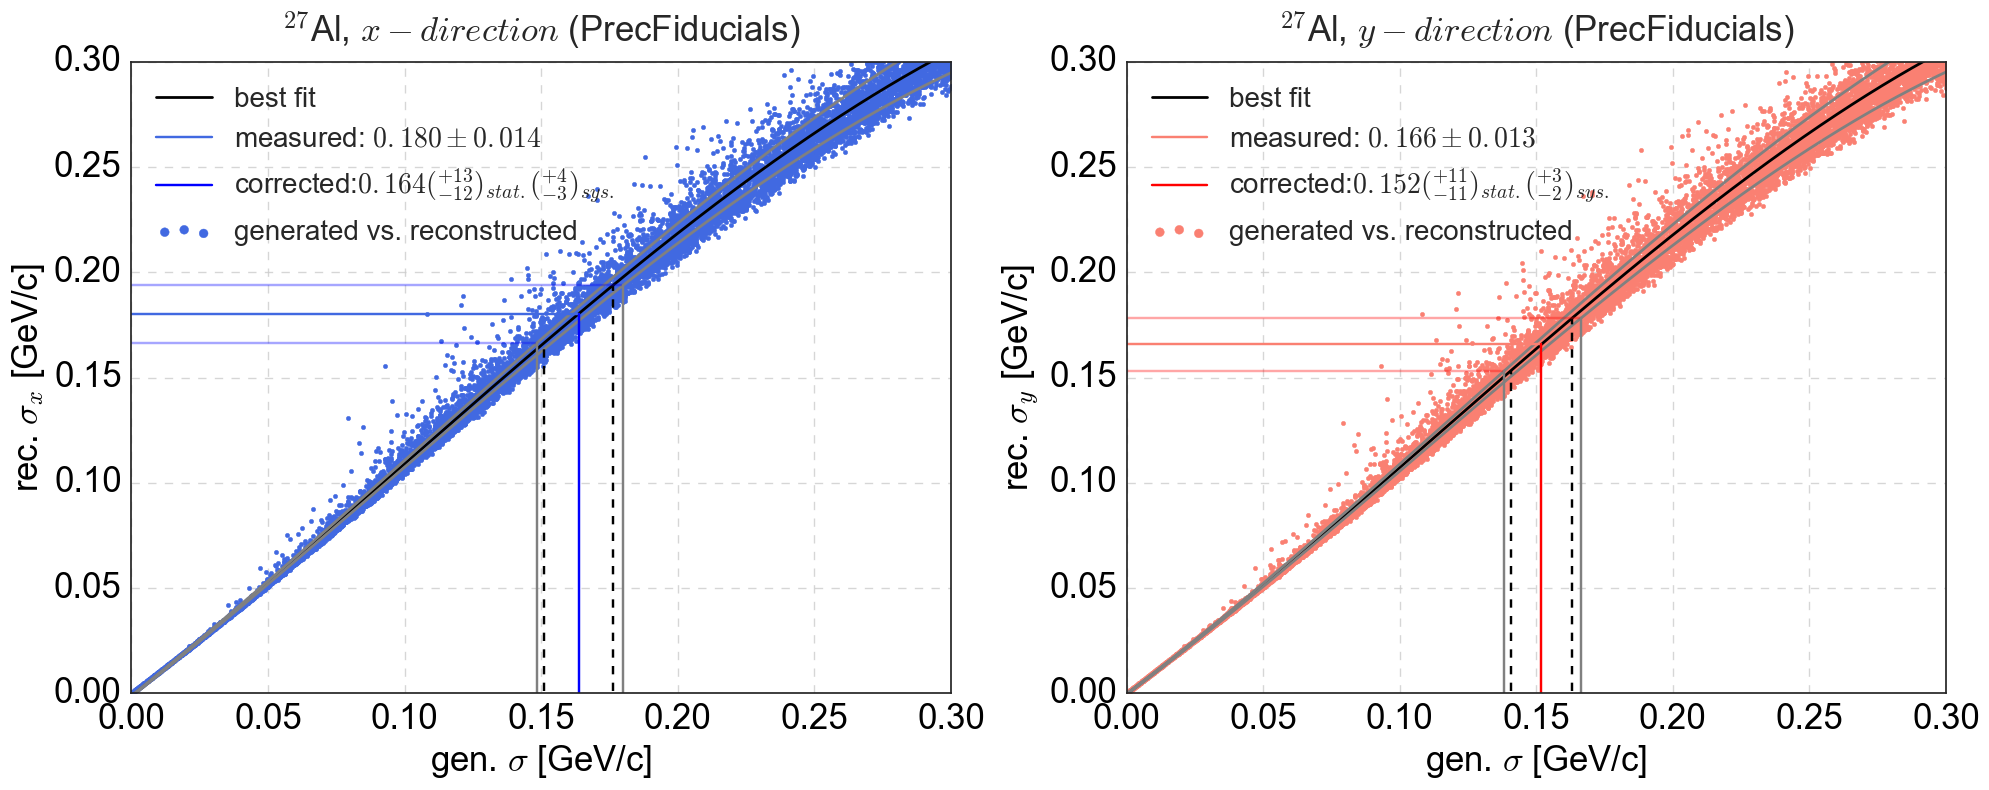

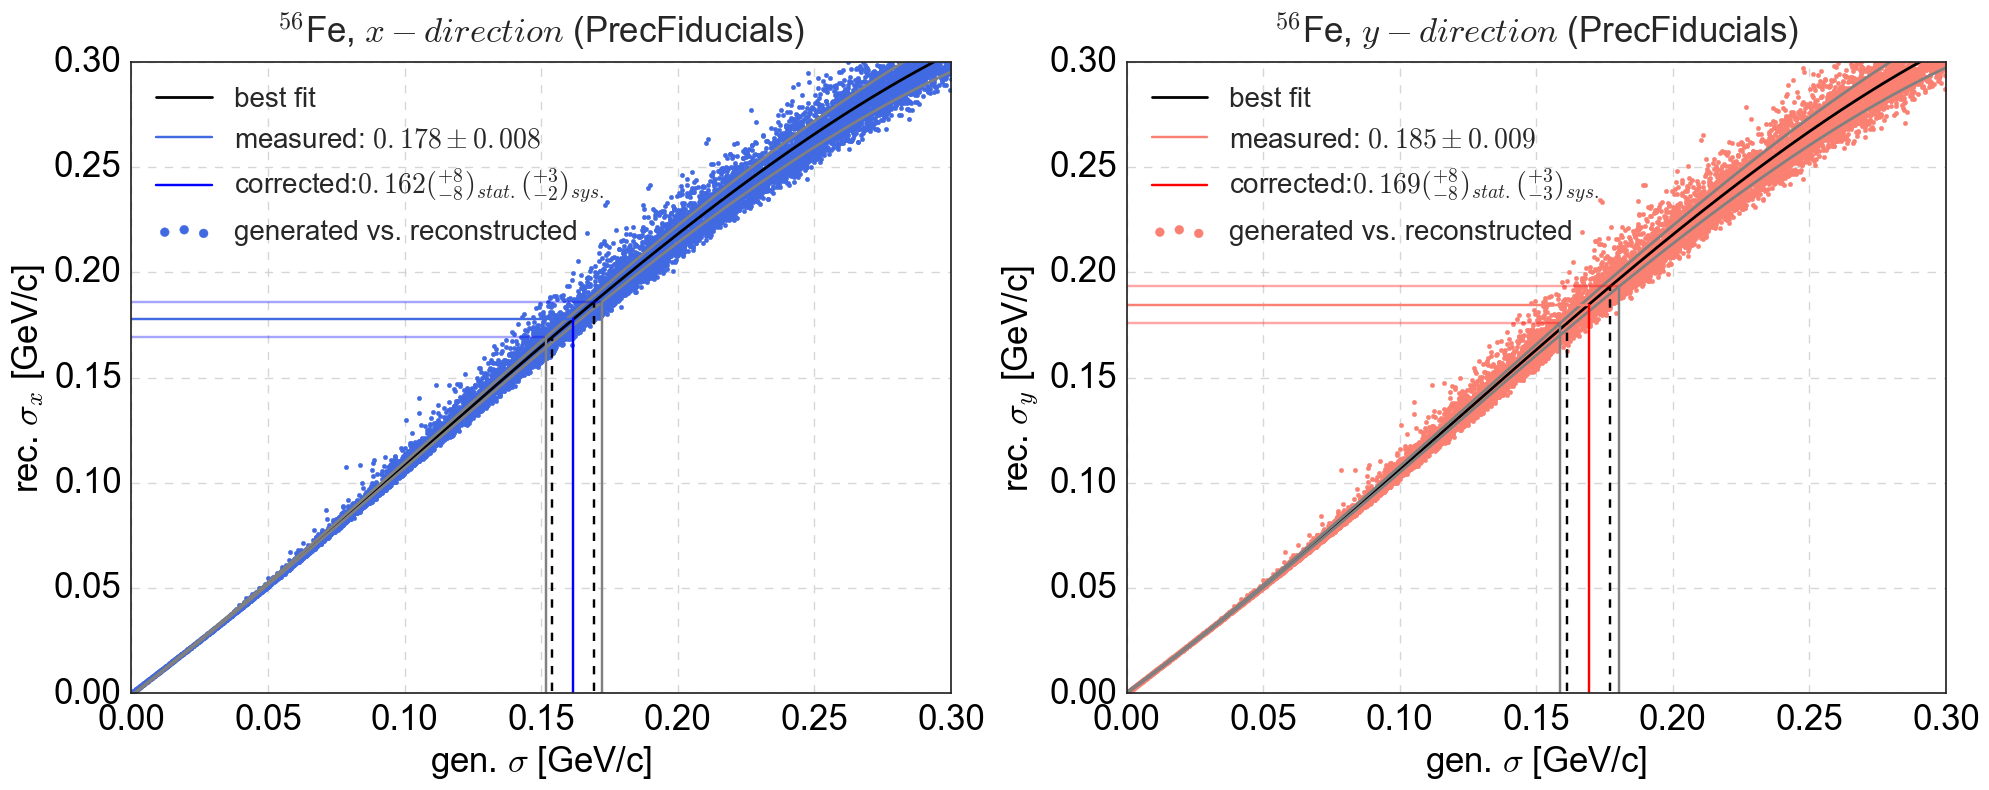

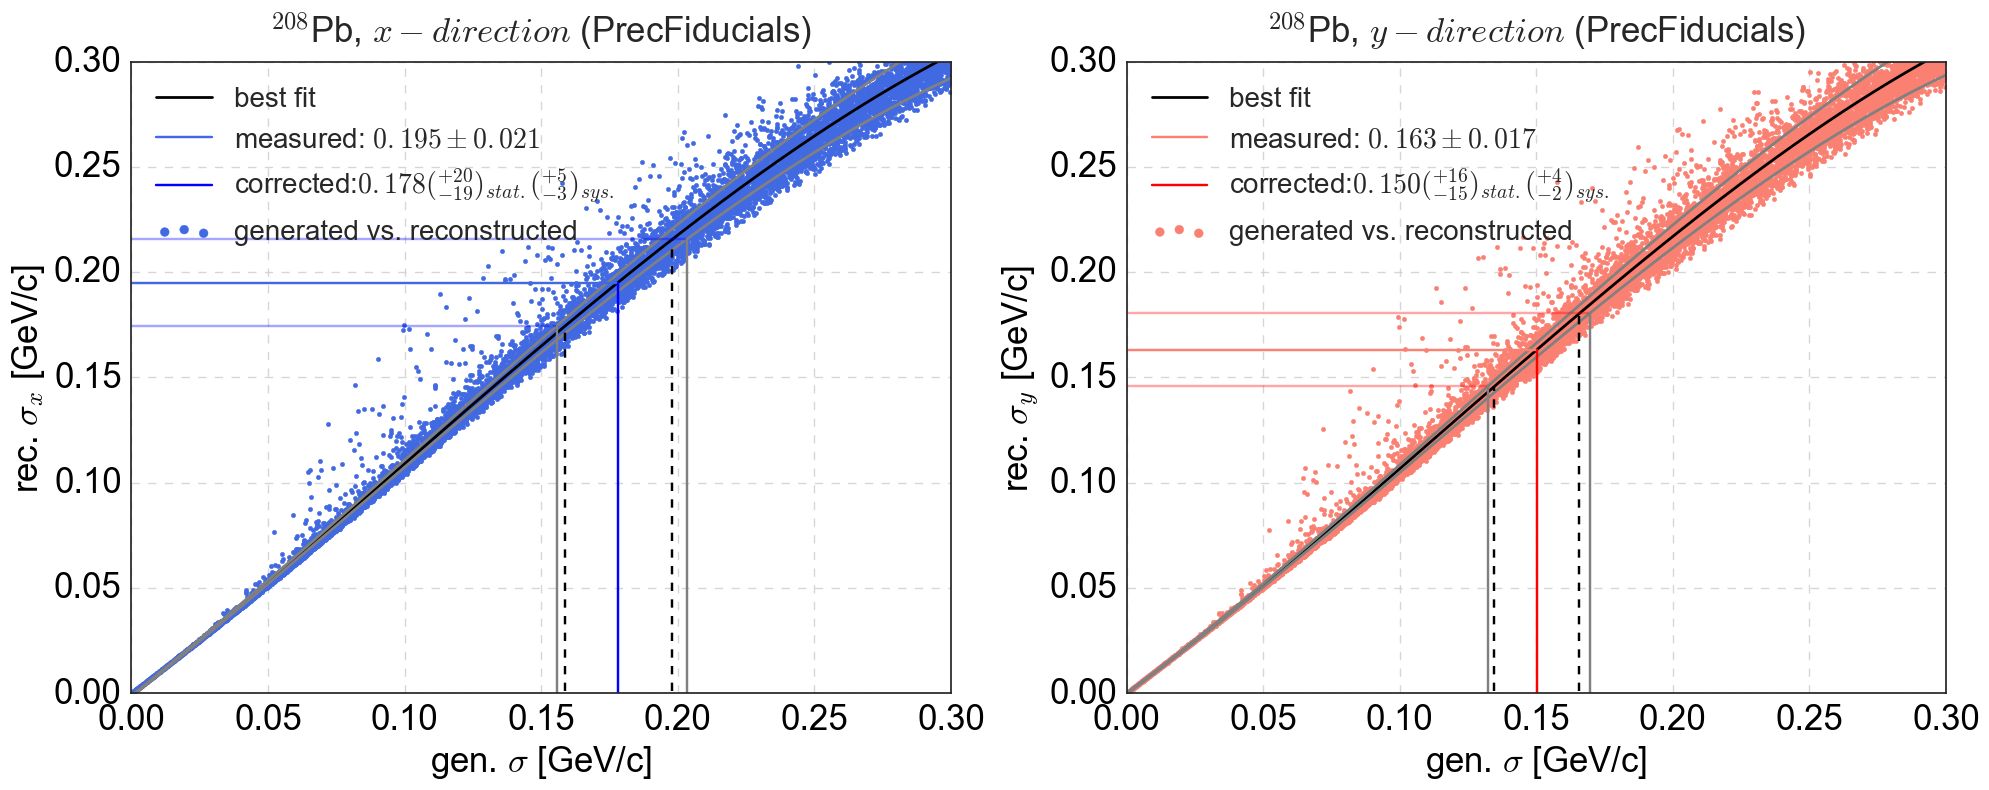

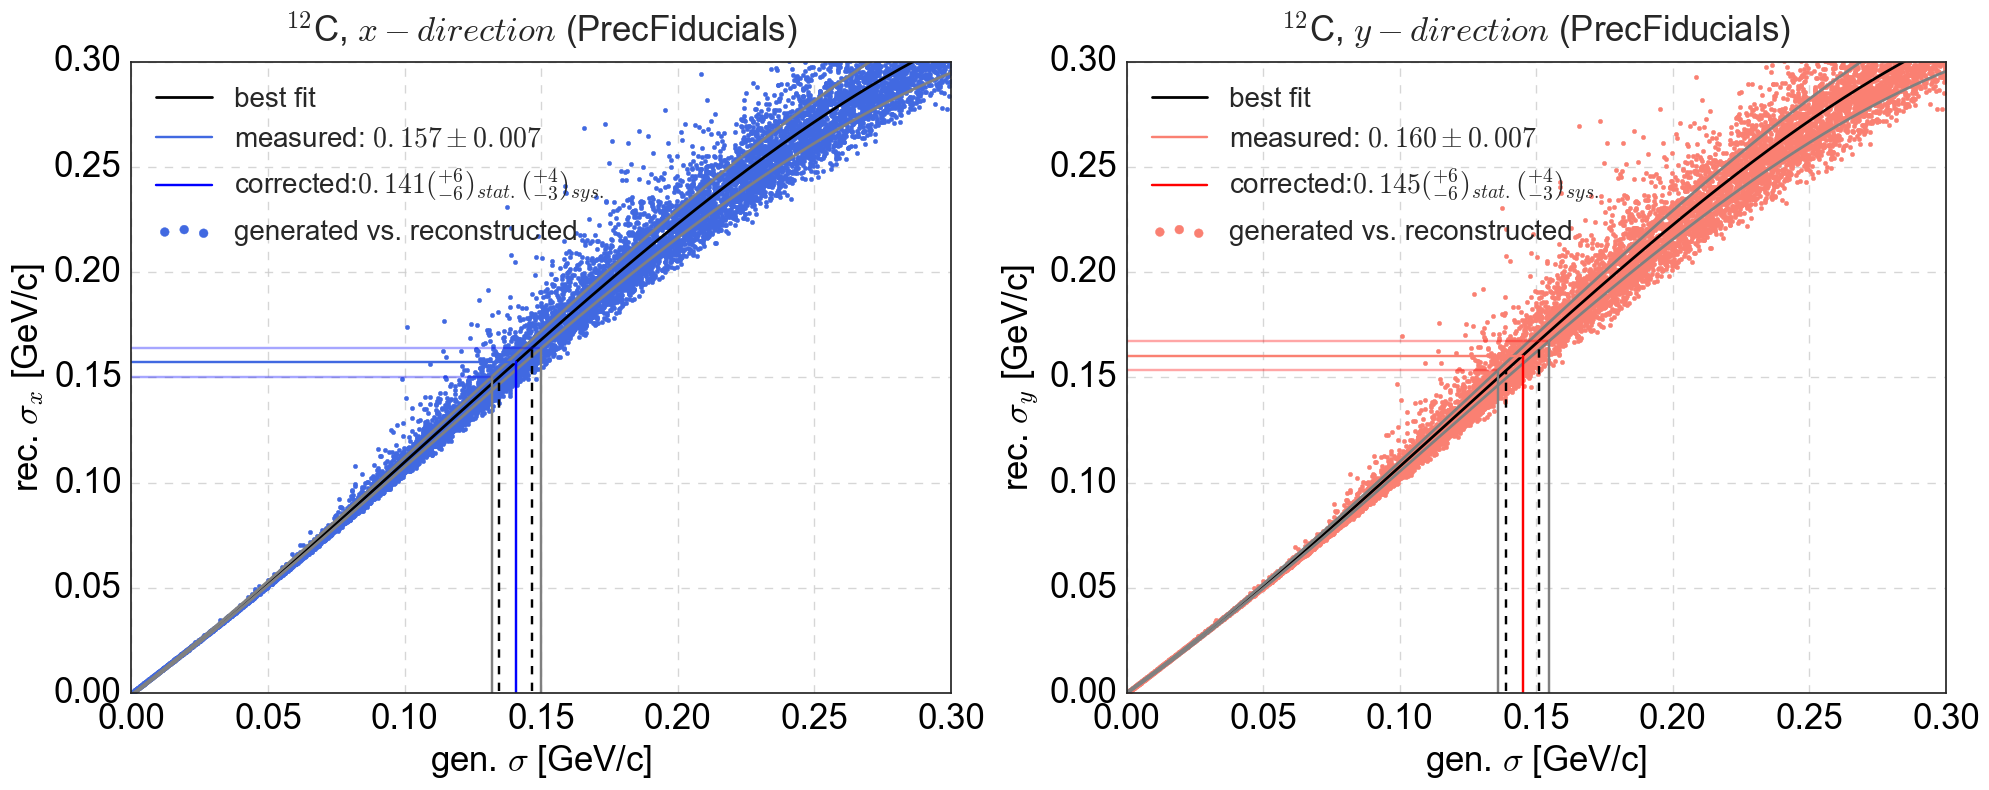

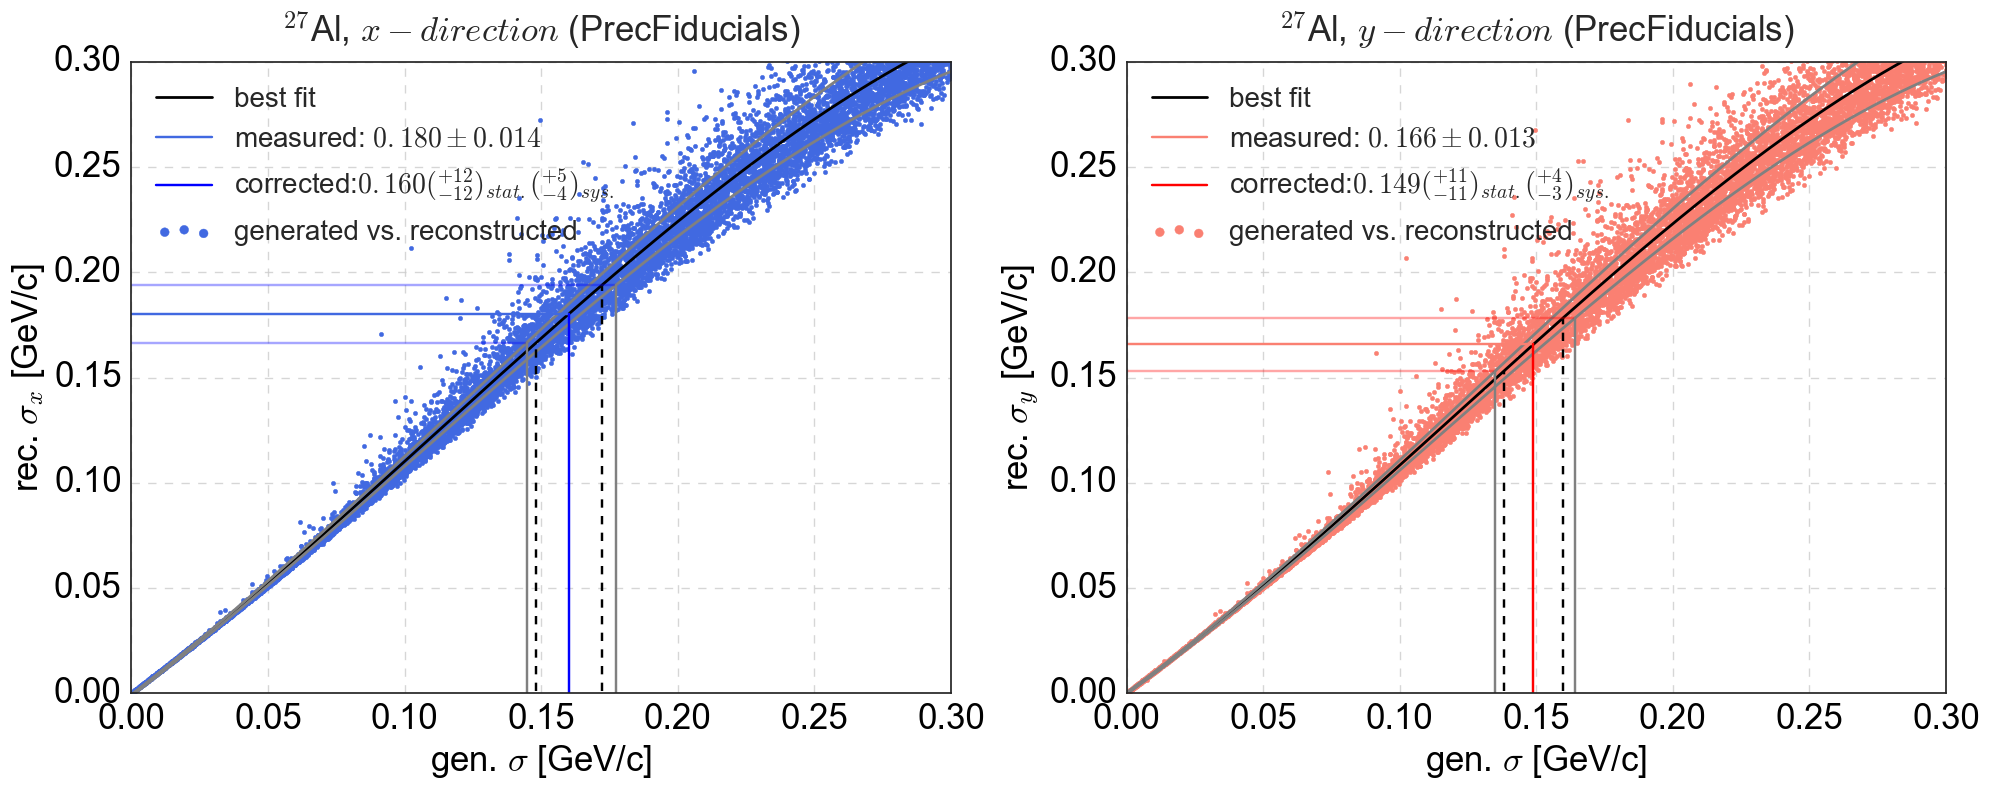

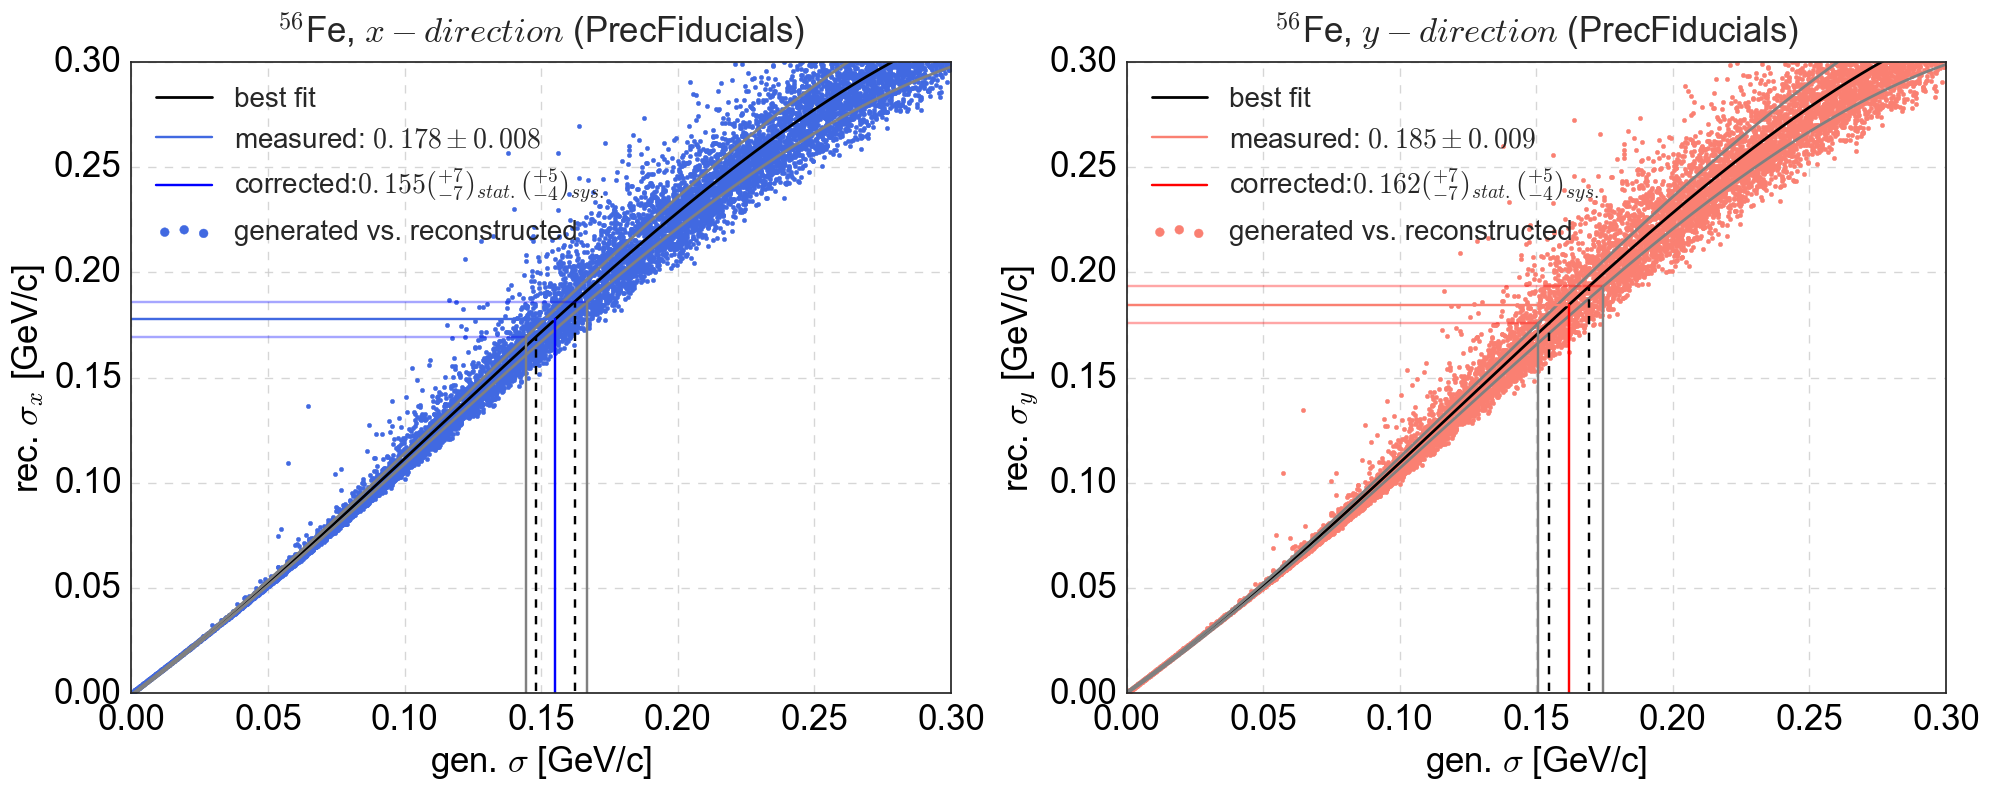

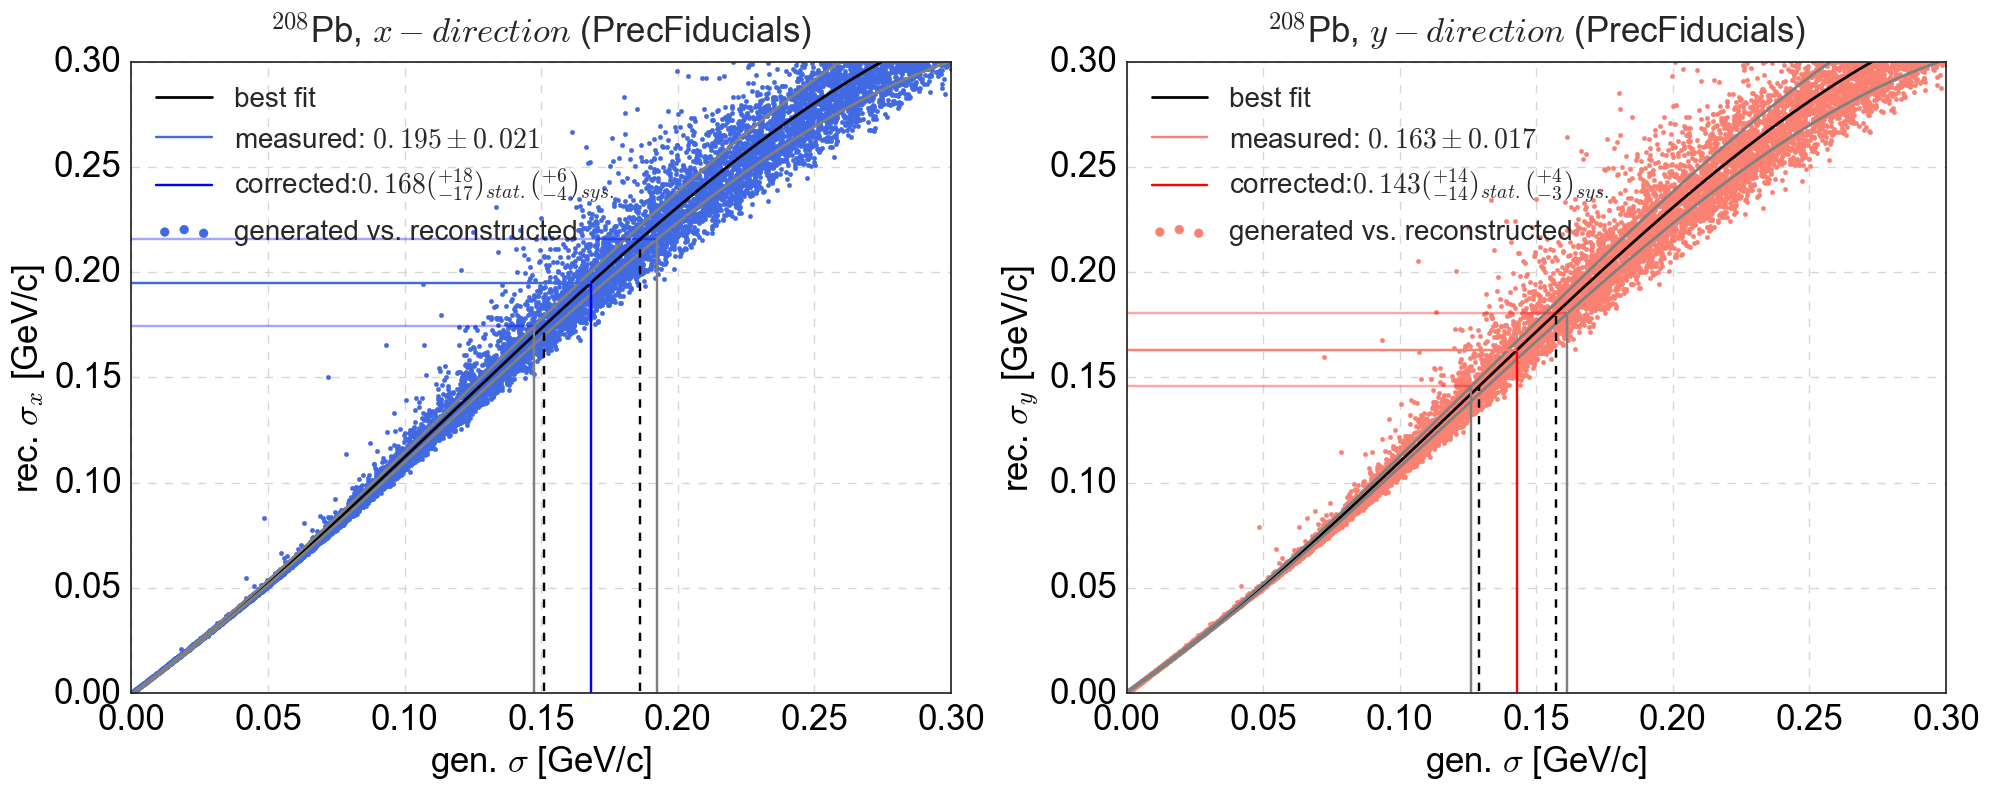

In [10]:
poly_degree = 3 # fit polynomial degree
confidence_interval = 0.68 # band around fit
Fiducials = "PrecFiducials"
for extraname in ["_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured","_mean75MeVc_sigma50MeVc"]:

    for A,target in zip([12,27,56,208]
                        ,['C','Al','Fe','Pb']
                       ):#{
        test_name = "sims_300Pmiss600_"+target+"_"+Fiducials+extraname
        simulations_results=simulation_results[test_name]
        good_results = simulations_results[(simulations_results['gen_SigmaZ']>0)
                                           &(simulations_results['rec_sigma_x']>0)
                                           &(simulations_results['rec_sigma_y']>0)                                                                                    
                                           &(simulations_results['rec_sigma_z']>0)
                                           &(simulations_results['rec_mean_x']>-0.9)
                                           &(simulations_results['rec_mean_y']>-0.9)                                                                                   
                                           &(simulations_results['rec_mean_z']>-0.9)
#                                            &(simulations_results['Naccepted']>7*(Neep+Neepp))
                                          ]
        fig=plt.figure(figsize=(20,8))
    
        ax=fig.add_subplot(1,2,1)    
        corr_sx = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials
                                                           ,extraname=extraname                                                                                                                
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='x'                                                           
                                                           ,colors=['blue','royalblue']);

        ax=fig.add_subplot(1,2,2)    
        corr_sy = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials  
                                                           ,extraname=extraname
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='y'                                                           
                                                           ,colors=['red','salmon']);                        
    
        plt.tight_layout()   

In [11]:
for Fiducials in ['PrecFiducials']:#,'NoPrecFiducials']:
    sample = cm_parameters_with_correction[Fiducials]
    for direction in ['x','y']:
        sample['sigma_'+direction+'_final'] = sample['sigma_'+direction+'_corrected']
        for updw in ['up','dw']:
            sample['sigma_'+direction+'_final_'+updw+'_err_tot'] = sample['sigma_'+direction+'_corrected_'+updw+'_err_tot']
            sample['sigma_'+direction+'_final_'+updw+'_err'] = sample['sigma_'+direction+'_final_'+updw+'_err_tot']

    sample['sigma_t_corrected'] = 0.5*(sample['sigma_x_corrected']+sample['sigma_y_corrected'])
    sample['sigma_t_final'] = 0.5*(sample['sigma_x_corrected']+sample['sigma_y_corrected'])

    for err_label in ['stat','sys','tot']:
        for updw in ['up','dw']:
            sample['sigma_t_final_'+updw+'_err_'+err_label] = 0.5*np.sqrt(np.square(sample['sigma_x_corrected_'+updw+'_err_'+err_label])                                                                              
                                                                          +np.square(sample['sigma_y_corrected_'+updw+'_err_'+err_label]))
    for updw in ['up','dw']:
        sample['sigma_t_final_'+updw+'_err'] = sample['sigma_t_final_'+updw+'_err_tot']

Fiducials = "PrecFiducials"
sample = cm_parameters_with_correction[Fiducials]
for extraname in ["_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured","_mean75MeVc_sigma50MeVc"]:
    for direction in ['x','y']:
        sample['sigma_'+direction+extraname+'_final'] = sample['sigma_'+direction+'_corrected'+extraname]
        for updw in ['up','dw']:
            sample['sigma_'+direction+extraname+'_final_'+updw+'_err_tot'] = sample['sigma_'+direction+'_corrected_'+updw+'_err_tot'+extraname]
            sample['sigma_'+direction+extraname+'_final_'+updw+'_err'] = sample['sigma_'+direction+extraname+'_final_'+updw+'_err_tot']

    sample['sigma_t'+extraname+'_corrected'] = 0.5*(sample['sigma_x_corrected'+extraname]+sample['sigma_y_corrected'+extraname])
    sample['sigma_t'+extraname+'_final'] = 0.5*(sample['sigma_x_corrected'+extraname]+sample['sigma_y_corrected'+extraname])

    for err_label in ['stat','sys','tot']:
        for updw in ['up','dw']:
            sample['sigma_t'+extraname+'_final_'+updw+'_err_'+err_label] = 0.5*np.sqrt(np.square(sample['sigma_x_corrected_'+updw+'_err_'+err_label+extraname])                                                                         
                                                                                       +np.square(sample['sigma_y_corrected_'+updw+'_err_'+err_label+extraname]))
    for updw in ['up','dw']:
        sample['sigma_t'+extraname+'_final_'+updw+'_err'] = sample['sigma_t_final_'+updw+'_err_tot']

In [12]:
cm_parameters_with_correction['PrecFiducials'][['sigma_t_before_acc_corr','sigma_t_before_acc_corr_err'
                                                ,'sigma_t_final'
                                                ,'sigma_t_final_up_err_stat','sigma_t_final_dw_err_stat'
                                                ,'sigma_t_final_up_err_sys','sigma_t_final_dw_err_sys'
                                                ,'sigma_t_final_up_err_tot','sigma_t_final_dw_err_tot']].astype(float)

sigma_t_before_acc_corr  sigma_t_before_acc_corr_err  sigma_t_final  \
0                 0.160008                     0.004905       0.143682   
1                 0.174126                     0.009284       0.154389   
2                 0.182190                     0.006045       0.159464   
3                 0.180172                     0.013463       0.153540   

   sigma_t_final_up_err_stat  sigma_t_final_dw_err_stat  \
0                   0.004254                   0.004236   
1                   0.008121                   0.008012   
2                   0.005164                   0.005115   
3                   0.011536                   0.011238   

   sigma_t_final_up_err_sys  sigma_t_final_dw_err_sys  \
0                  0.001030                  0.000868   
1                  0.002309                  0.001658   
2                  0.001497                  0.001211   
3                  0.005382                  0.003143   

   sigma_t_final_up_err_tot  sigma_t_final_dw_err_tot  
0                  0.004377                  0.004324  
1                  0.008443                  0.008182  
2                  0.005376                  0.005257  
3                  0.012729                  0.011669

# add calculations...

In [13]:
ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[110,141,146,147.5,145.5],# average of HO and WS
                        'nl00':[110,157,166,173.,177.5]},# average of HO and WS
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc = pd.DataFrame({'A':[4 , 12 , 40 , 56 , 208], # 3 , 
                        's_t':[90 , 138.6174 , 142.6555 , 132.5117 , 151.3311]}, # 0.0724
                         index = ['$^{4}$He','$^{12}$C','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb']) # '$^{3}$He',
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[165.8 , 188.3 , 198.8]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])

BNL_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.143],'sigma_t_final_Err':[0.017]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.136],'sigma_t_final_Err':[0.020]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'sigma_t_final':[0.100],'sigma_t_final_Err':[0.020]},index = ['$^{4}$He'])

WI_Data = pd.DataFrame({'A':[ 12 , 27 , 56 , 208], 
                        'sigma_t_final':[0.158 , 0.156 , 0.181 , 0.174], 
                        'sigma_t_final_Err':[0.012 , 0.019 , 0.011 , 0.016]}, 
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']) 

In [14]:
from scipy.interpolate import interp1d, Akima1DInterpolator,BarycentricInterpolator,splprep

def plot_data(data , ax=None, direction='t', Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None , facecolors=None ):
    ax.errorbar((data['A']+Ashift), 
                y=1000*data['sigma_'+direction+'_final'],
                yerr=1000*data['sigma_'+direction+'_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth
                , fmt=fmt,label=label)

def plot_data_assymetric(data , ax=None, direction='t', Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None , facecolors=None ):
    ax.errorbar((data['A']+Ashift), 
                y=1000*data['sigma_'+direction+'_final'],
                yerr=[1000*data['sigma_'+direction+'_final_dw_err'],1000*data['sigma_'+direction+'_final_up_err']],
                color=color, marker=marker,markersize=markersize,linewidth=linewidth
                , fmt=fmt,label=label)

    
    
def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' ,linestyle='--', label=None, linewidth=4):
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')
    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)
    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, linestyle, color=color , label=label, linewidth=linewidth )

In [15]:
def plot_needed_for_A_depdendence_sigma_t(ax=None,figsize=(16,15),s=30,
                                          xlim=(2.5,250), ylim=(0,200), #79
                                          labels=dict({'$^4$He':(3.5,122),
                                                '$^{12}$C':(9,165),
                                                '$^{27}$Al':(21,182),
                                                '$^{56}$Fe':(45,185),
                                                '$^{208}$Pb':(140,184),                                               
                                                      }),
                                          fontsize=55,
                                          do_Ciofi=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    # for all plots
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='black' ,label='Colle et al., All pairs')
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-',color='black', vary='nl00',label='Colle et al., $^1S_0$ pairs')
    if do_Ciofi: ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,markeredgecolor='black',marker='*',ms=30,mfc='none',linewidth=0, markeredgewidth=2,label='Ciofi and Simula')
    plot_data( data=BNL_Data, ax=ax, Ashift=1 , color='blue', marker='s', label=None )
    plot_data( data=HallA_Data, ax=ax, Ashift=-1 , color='blue' , marker='s' , label='Hall-A/BNL' )
    plot_data( data=Korover_Data , ax=ax, marker='s' , color='blue', label=None )
    
    ax.set_xscale('log')
    set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=fontsize 
             ,xticks=[4,12,27,56,208]
             ,yticks=[100,125,150,175,200])
    ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)    
    if xlim is not None:    ax.set_xlim(xlim);
    if ylim is not None:    ax.set_ylim(ylim);
    # target name labels
    for label in list(labels.keys()):
        ax.text(labels[label][0],labels[label][1],label,fontsize=35)
    return ax

def plot_A_depdendence_sigma_t(data=cm_parameters_with_correction['PrecFiducials'],
                               figsize=(16,15),s=30,fontsize=55,
                               xlim=(2.5,250), ylim=(79,200),  #79
                               do_save_fig=True, filename='corrected_sigma_t_with_calculations',
                               labels=dict({'$^4$He':(3.5,122), '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,185), '$^{208}$Pb':(140,184), }),
                               do_Ciofi=True,do_measured=True,
                               do_stat_uncertainties=False,do_sys_uncertainties=False,do_tot_uncertainties=True):
    
    fig,ax = plt.subplots(figsize=figsize)
    ax=plot_needed_for_A_depdendence_sigma_t(ax=ax,figsize=figsize,fontsize=fontsize,s=s,xlim=xlim, ylim=ylim,labels=labels,do_Ciofi=do_Ciofi)
    # measured
    if do_measured: ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
    # corrected
    if do_tot_uncertainties:
        plot_data_assymetric( data=data, ax=ax, label='This work', markersize=20 ,color='red' , marker='o')
        
    # seperated statistical uncertainty
    if do_stat_uncertainties: 
        A,st,sterr = cm_pars['A'], 1000*data['sigma_t_final'], 1000*data['sigma_t_final_Err_stat']
        if do_tot_uncertainties:
            ax.errorbar(A,st,sterr ,ecolor='purple',elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')
        else: 
            ax.errorbar(A,st,sterr ,ecolor='red',color='red', marker='o', markersize=20 ,elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')

#     ax.legend(fontsize=25,loc='lower right')
    # add a band of systematical uncertaintes
    if do_sys_uncertainties:
        ax.fill_between(cm_pars['A']
                        , np.min(ax.get_ylim())
                        , np.min(ax.get_ylim()) + 1000*data['sigma_t_final_up_err_sys'] 
                        , color='purple' , alpha=0.5 ,  label='sys. uncertainties')
    ax.legend(fontsize=25,loc='upper left')        
    plt.tight_layout()

/Users/erezcohen/Library/Python/2.7/lib/python/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


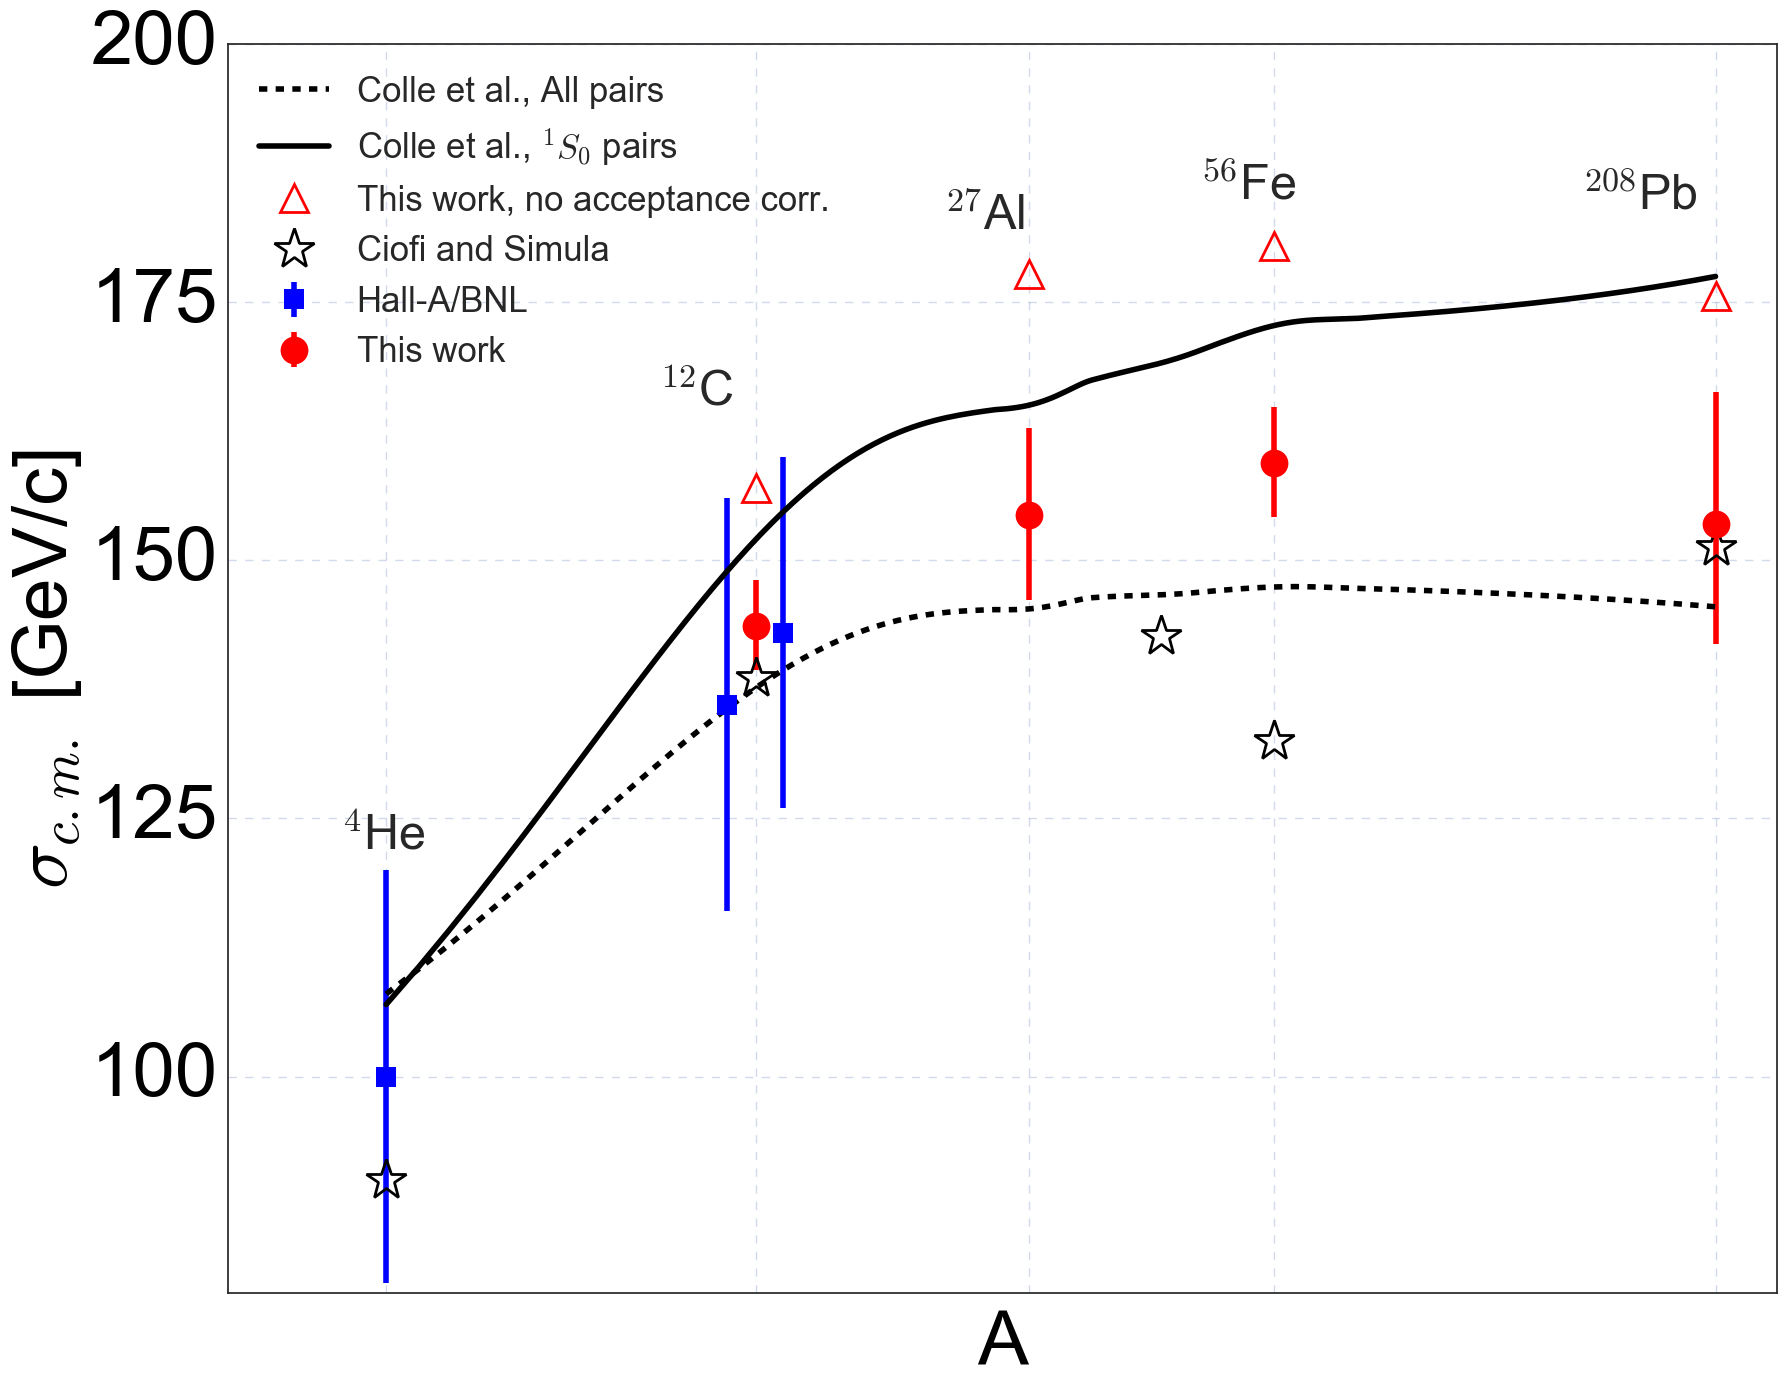

In [16]:
plot_A_depdendence_sigma_t(data=cm_parameters_with_correction['PrecFiducials']
                           ,figsize=(18,14)
                           ,do_stat_uncertainties=False,do_sys_uncertainties=False)

# compare mean(z) linear in $p_{miss}$ (slope$\times(p_{miss}-0.3)$) with 5 $\times \Delta_{measured}$

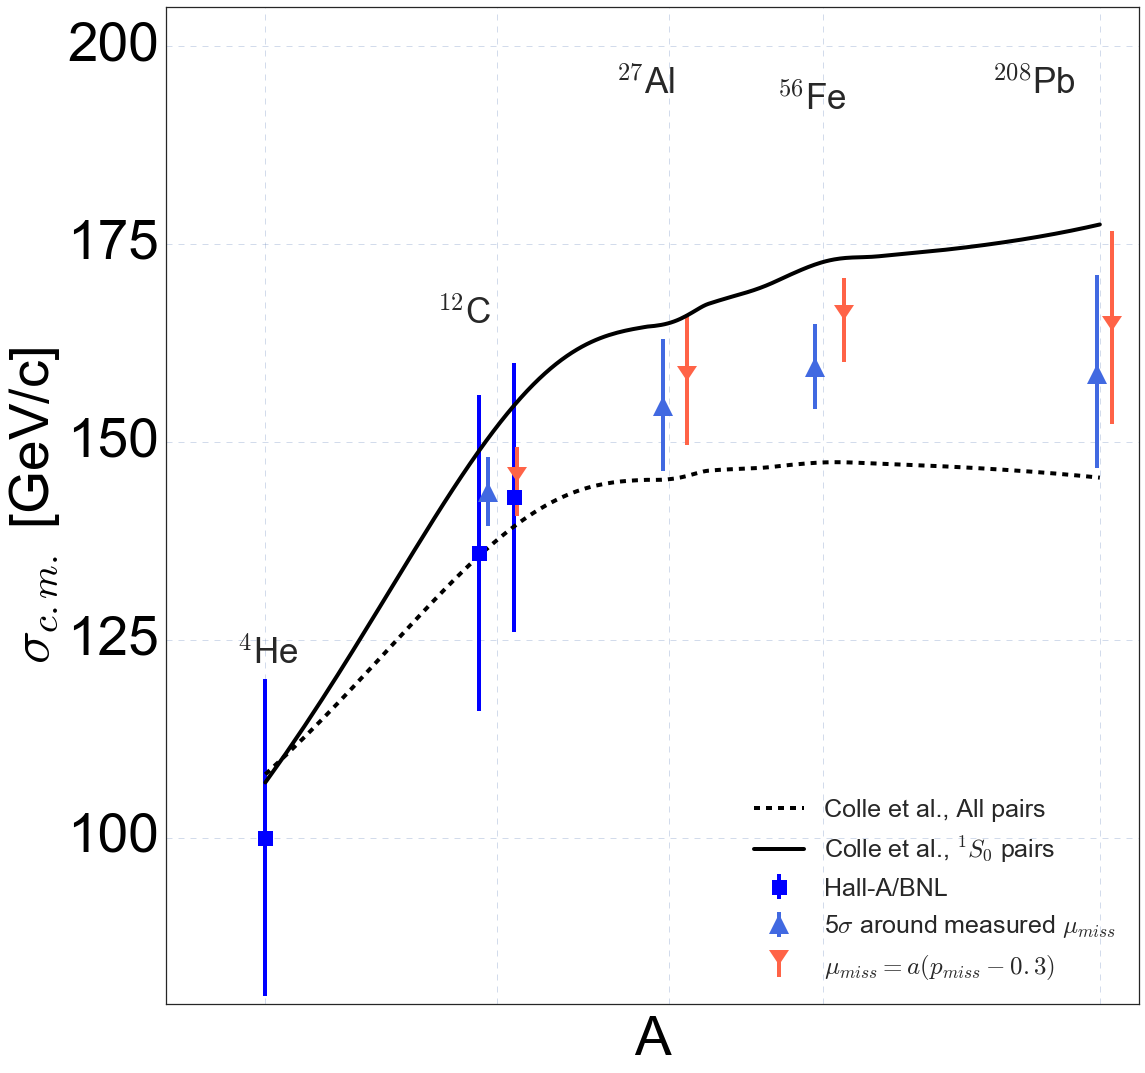

In [22]:
extraname="_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured"
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,194),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(125,194), }),do_Ciofi=False)
plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'], ax=ax,Ashift=[-0.5,-0.7,-2,-3], label='5$\\sigma$ around measured $\\mu_{miss}$', color='royalblue',markersize=20  )
plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'], ax=ax,Ashift=[1.2,2.5,6,12] ,direction='t'+extraname, label='$\\mu_{miss}=a(p_{miss}-0.3)$',color='tomato',markersize=20 , marker=7 )
ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()

# what happens for generation of a fixed $\mu_z$ in the measured values?

In [18]:
Fiducials = "PrecFiducials"
for extraname in ["fixed_meanZmeasured","fixed_meanZ03"]:
    for target in ['C','Al','Fe','Pb']:#{
        test_name = "sims_300Pmiss600_"+target+"_"+Fiducials+extraname
        simulation_results[test_name] = pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation_300Pmiss600/"+extraname+'_'+target+'_12150.csv')
        simulation_results[test_name].fillna(-1,inplace=True)
        print len(simulation_results[test_name]),'events in ',test_name

12150 events in  sims_300Pmiss600_C_PrecFiducialsfixed_meanZmeasured
12150 events in  sims_300Pmiss600_Al_PrecFiducialsfixed_meanZmeasured
12150 events in  sims_300Pmiss600_Fe_PrecFiducialsfixed_meanZmeasured
12150 events in  sims_300Pmiss600_Pb_PrecFiducialsfixed_meanZmeasured
12150 events in  sims_300Pmiss600_C_PrecFiducialsfixed_meanZ03
12150 events in  sims_300Pmiss600_Al_PrecFiducialsfixed_meanZ03
12150 events in  sims_300Pmiss600_Fe_PrecFiducialsfixed_meanZ03
12150 events in  sims_300Pmiss600_Pb_PrecFiducialsfixed_meanZ03


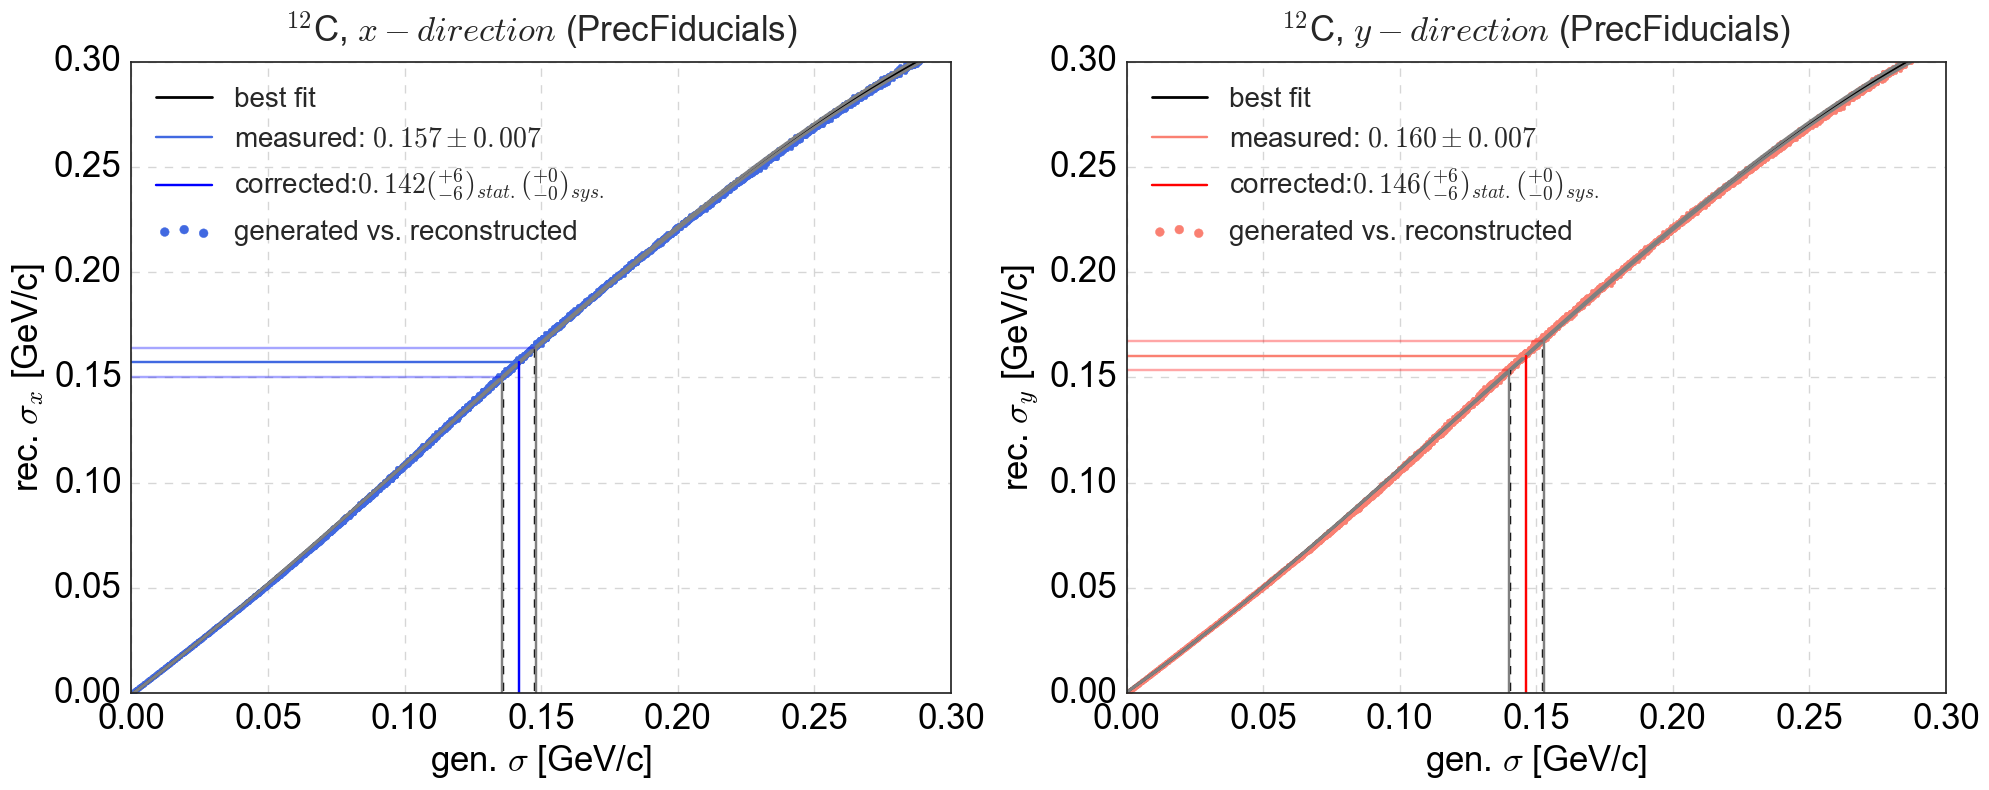

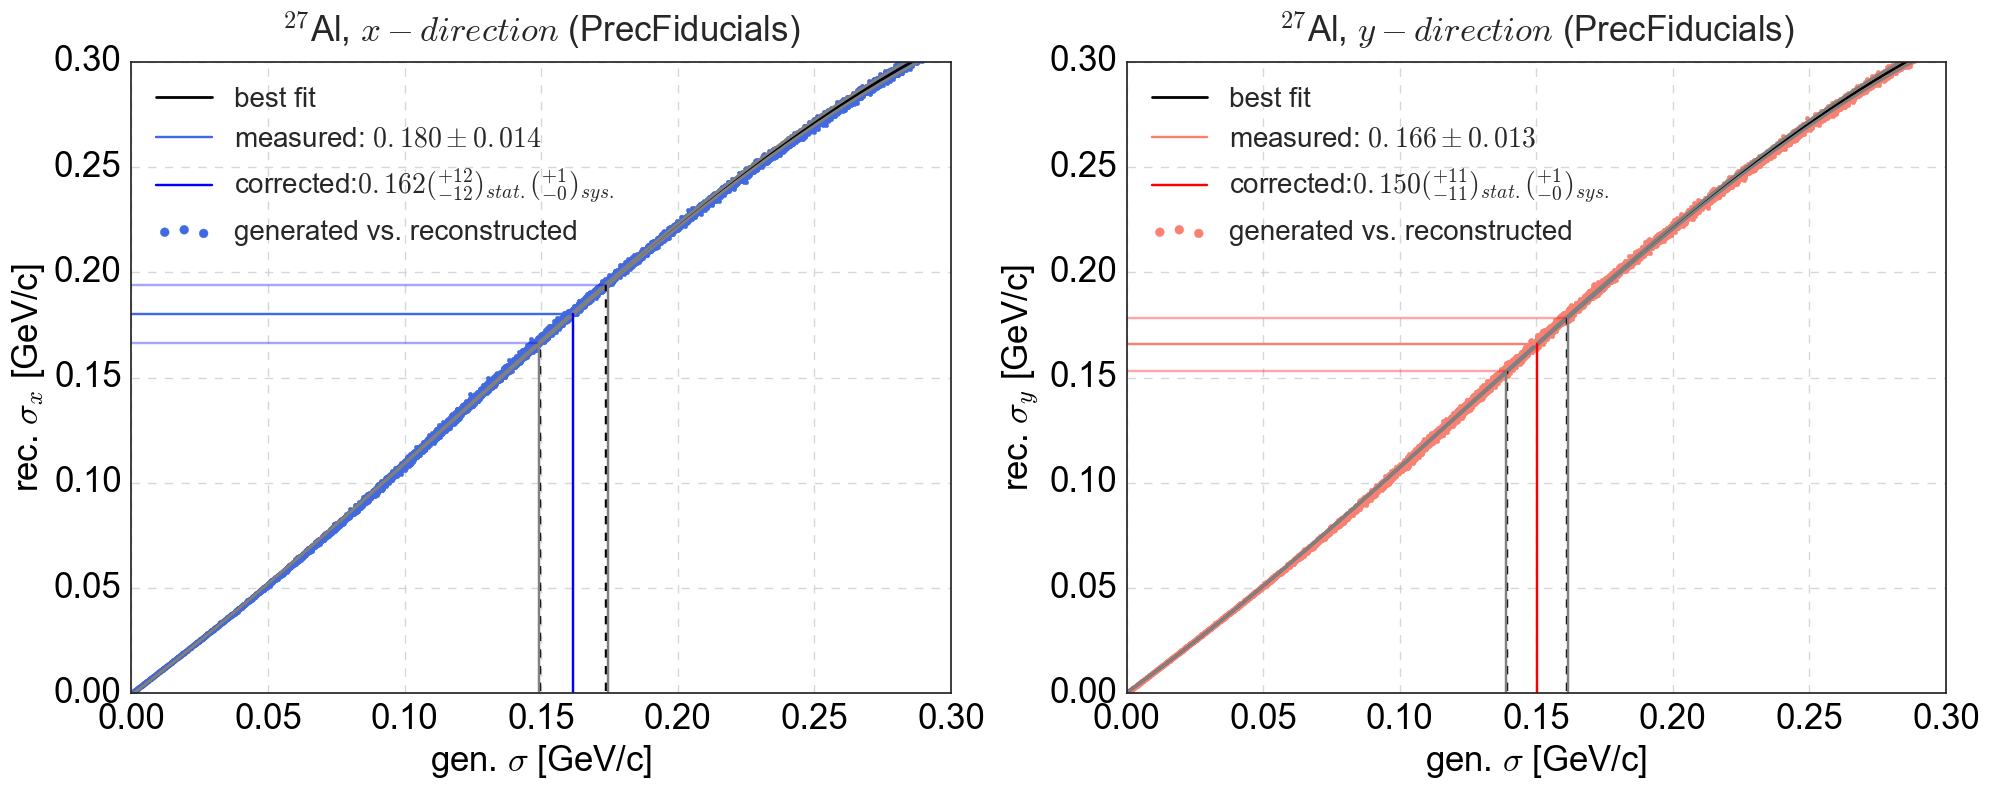

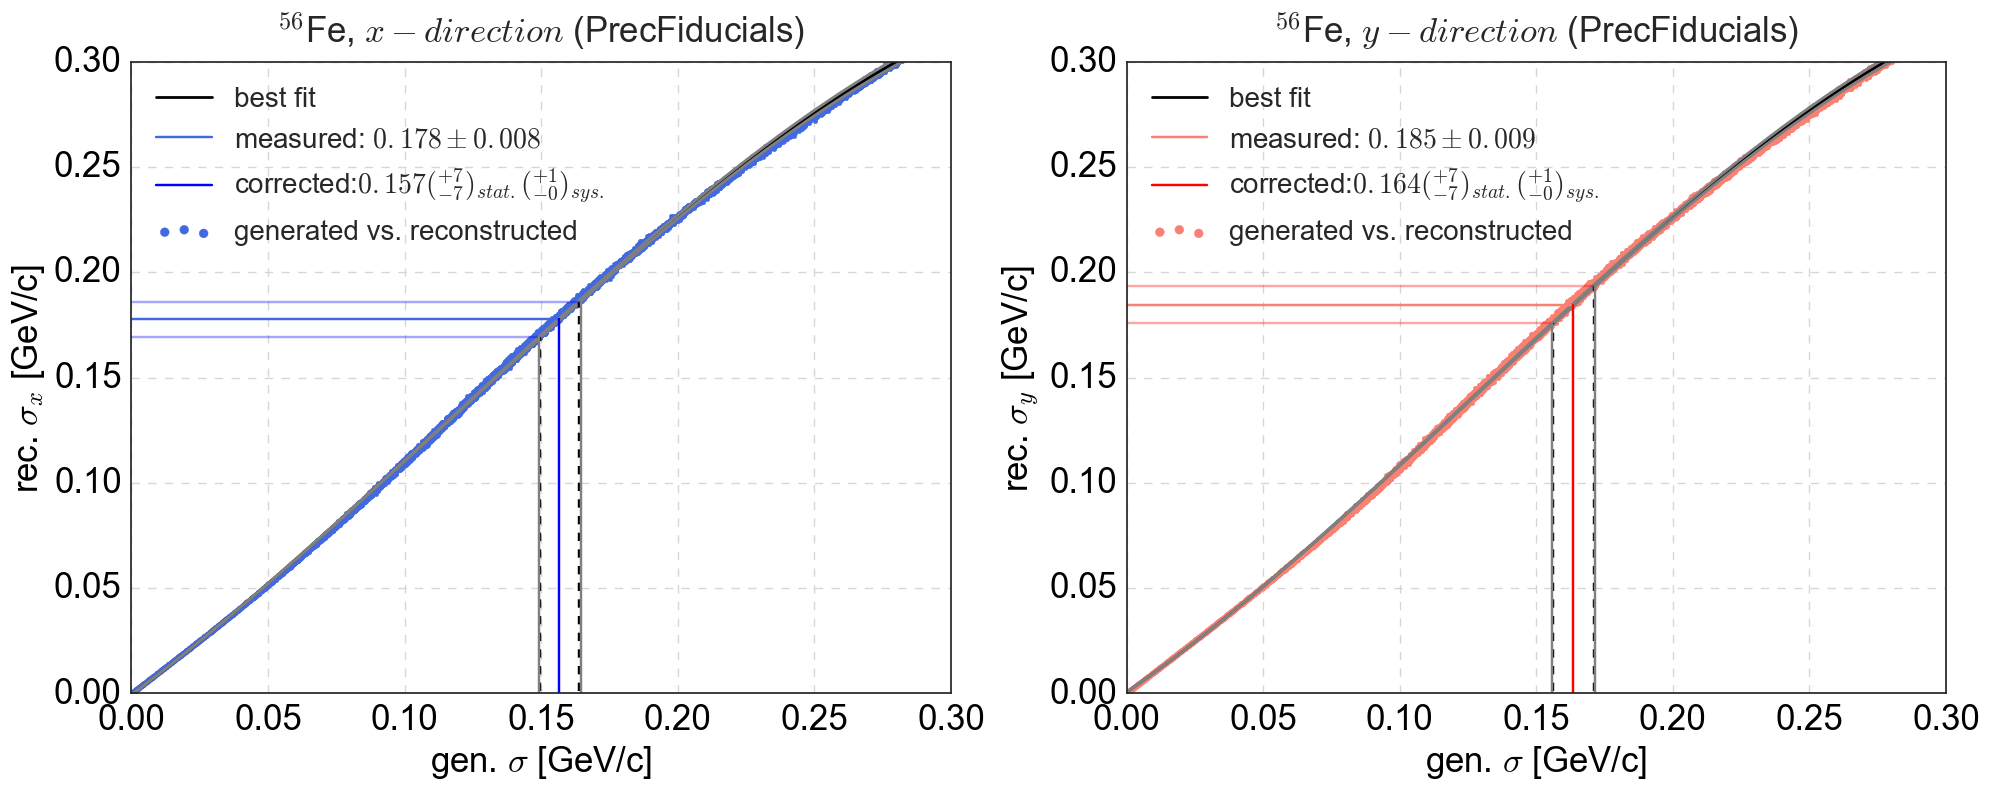

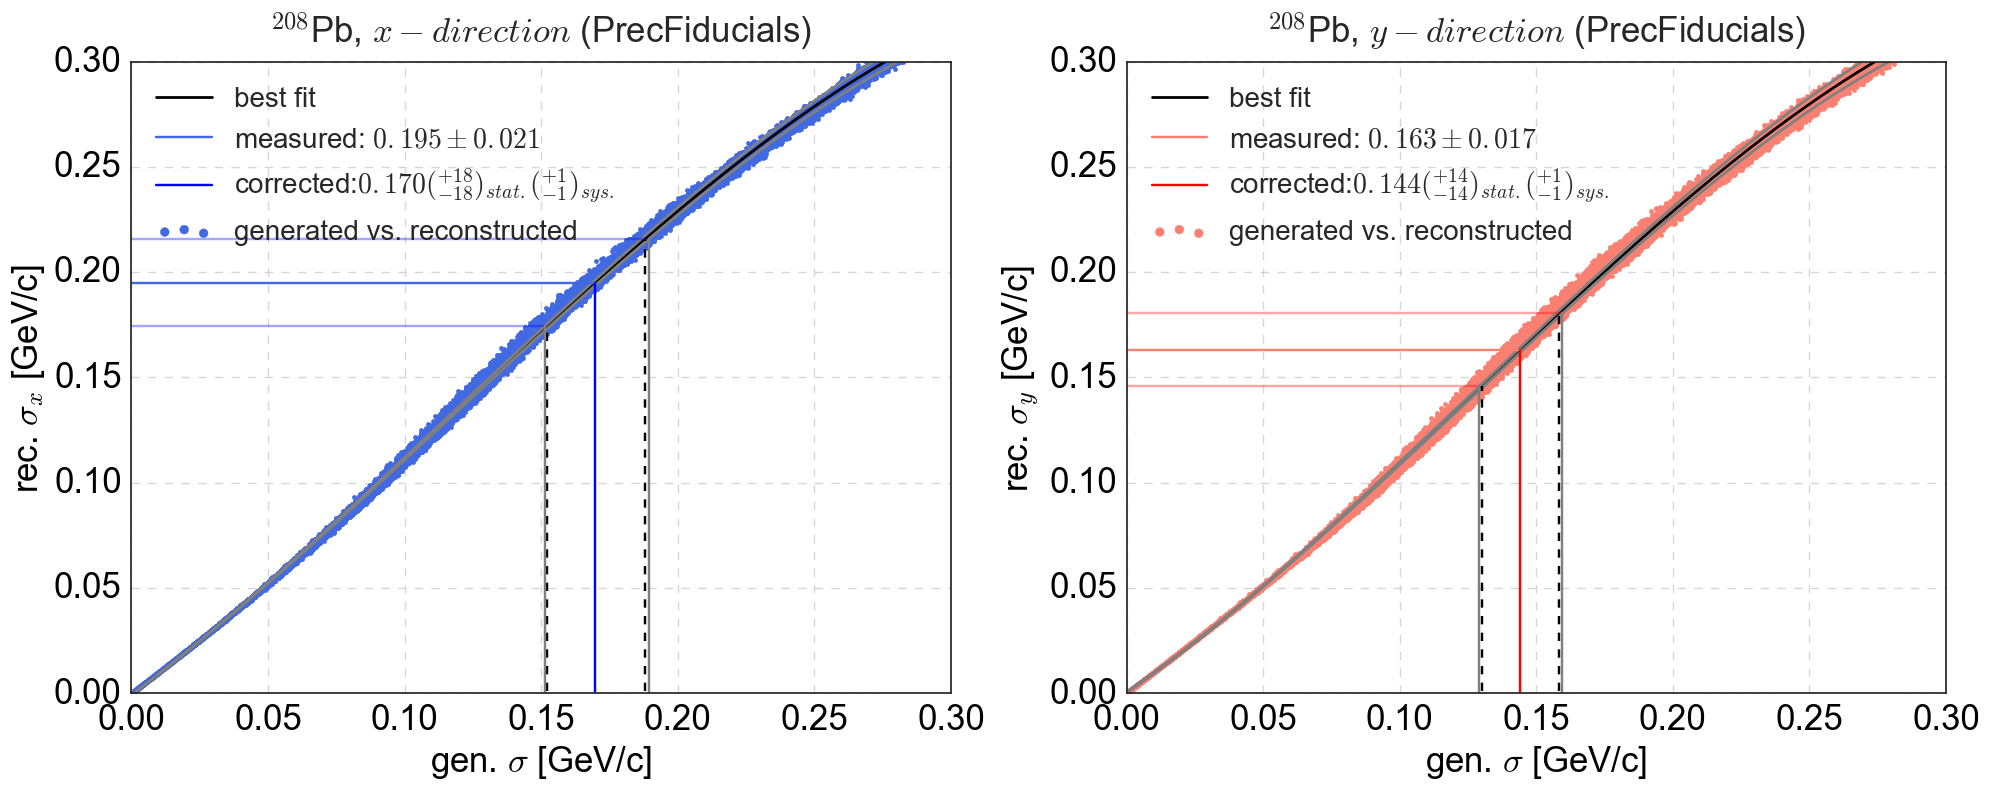

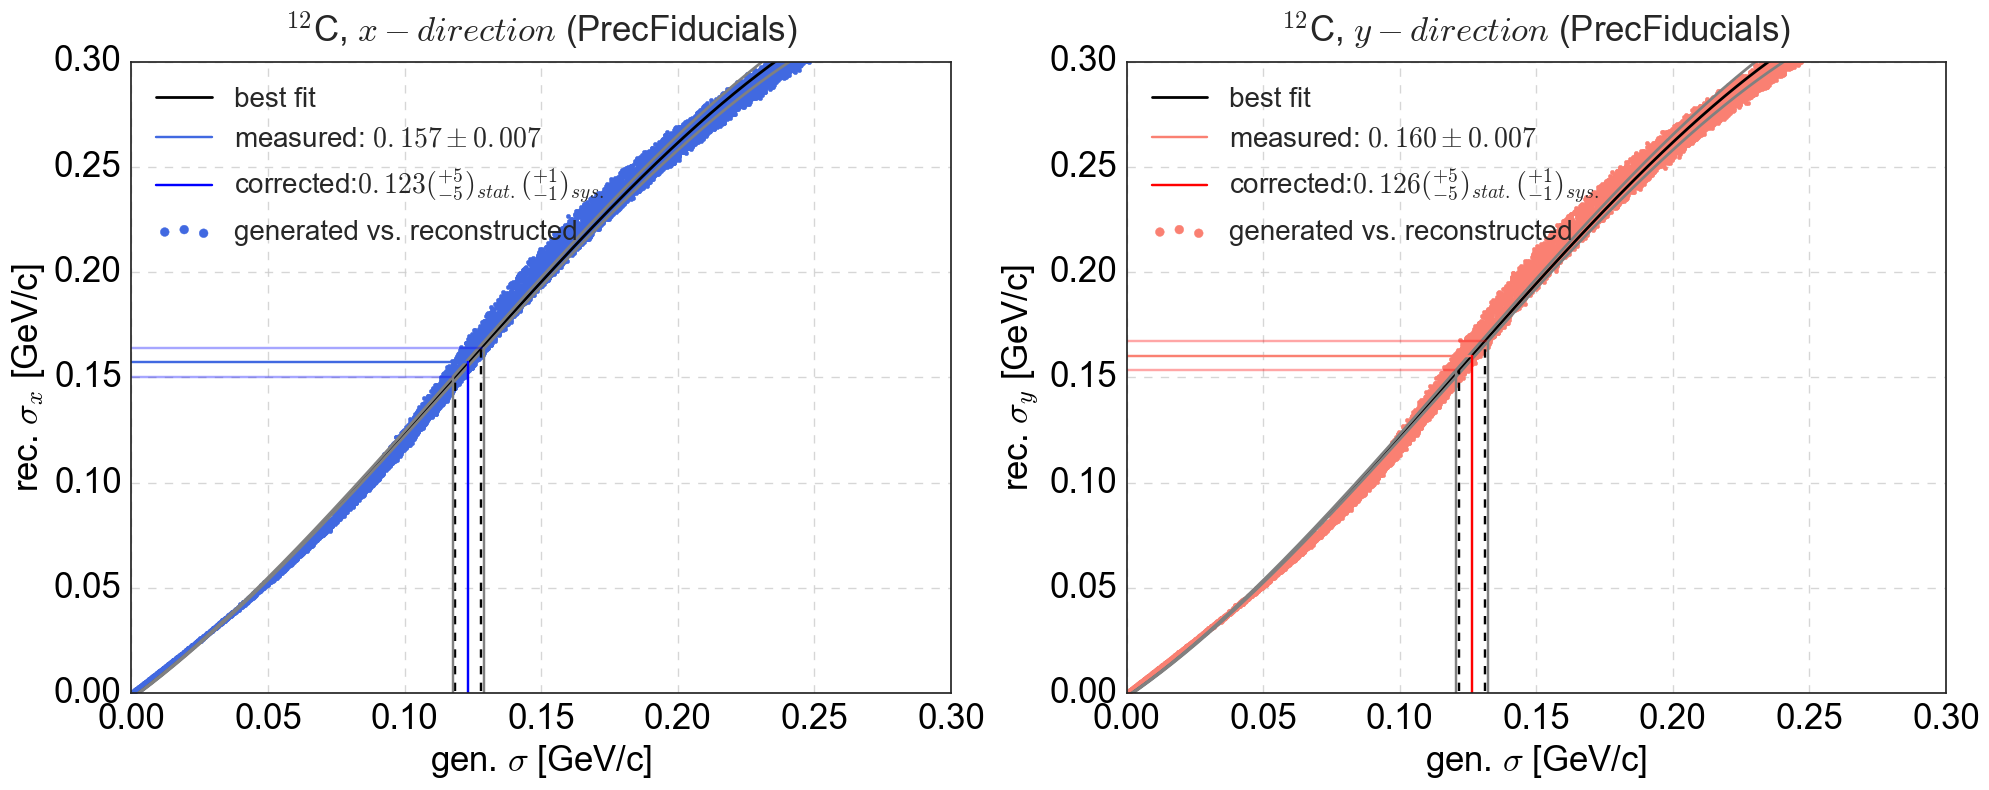

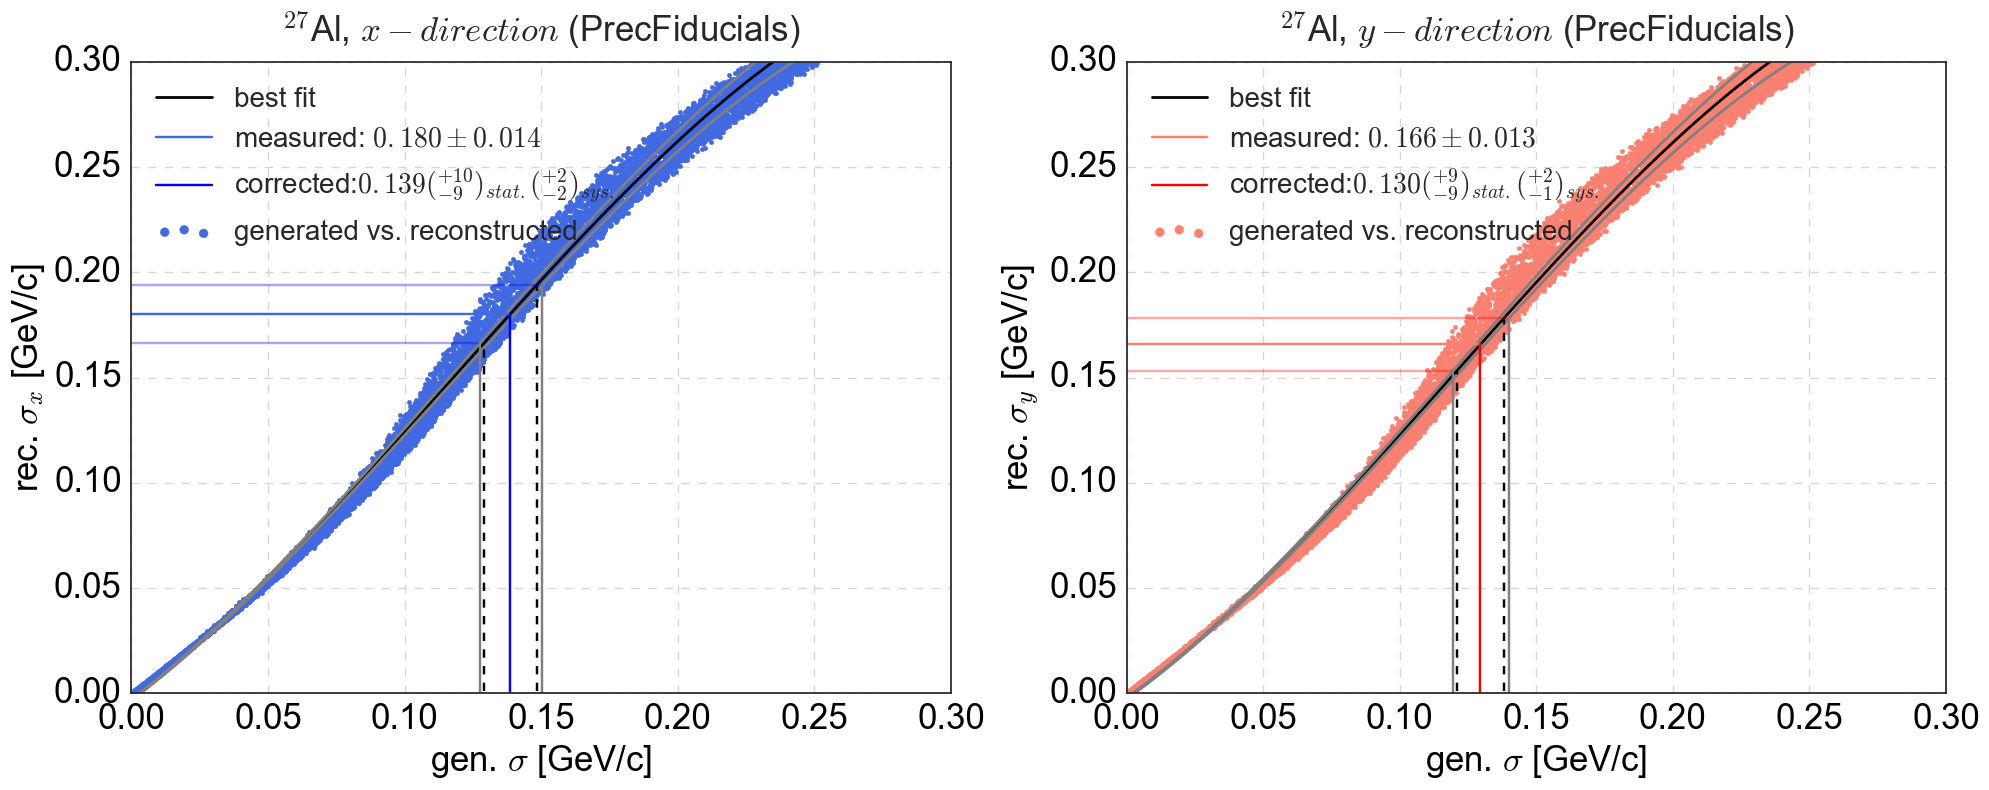

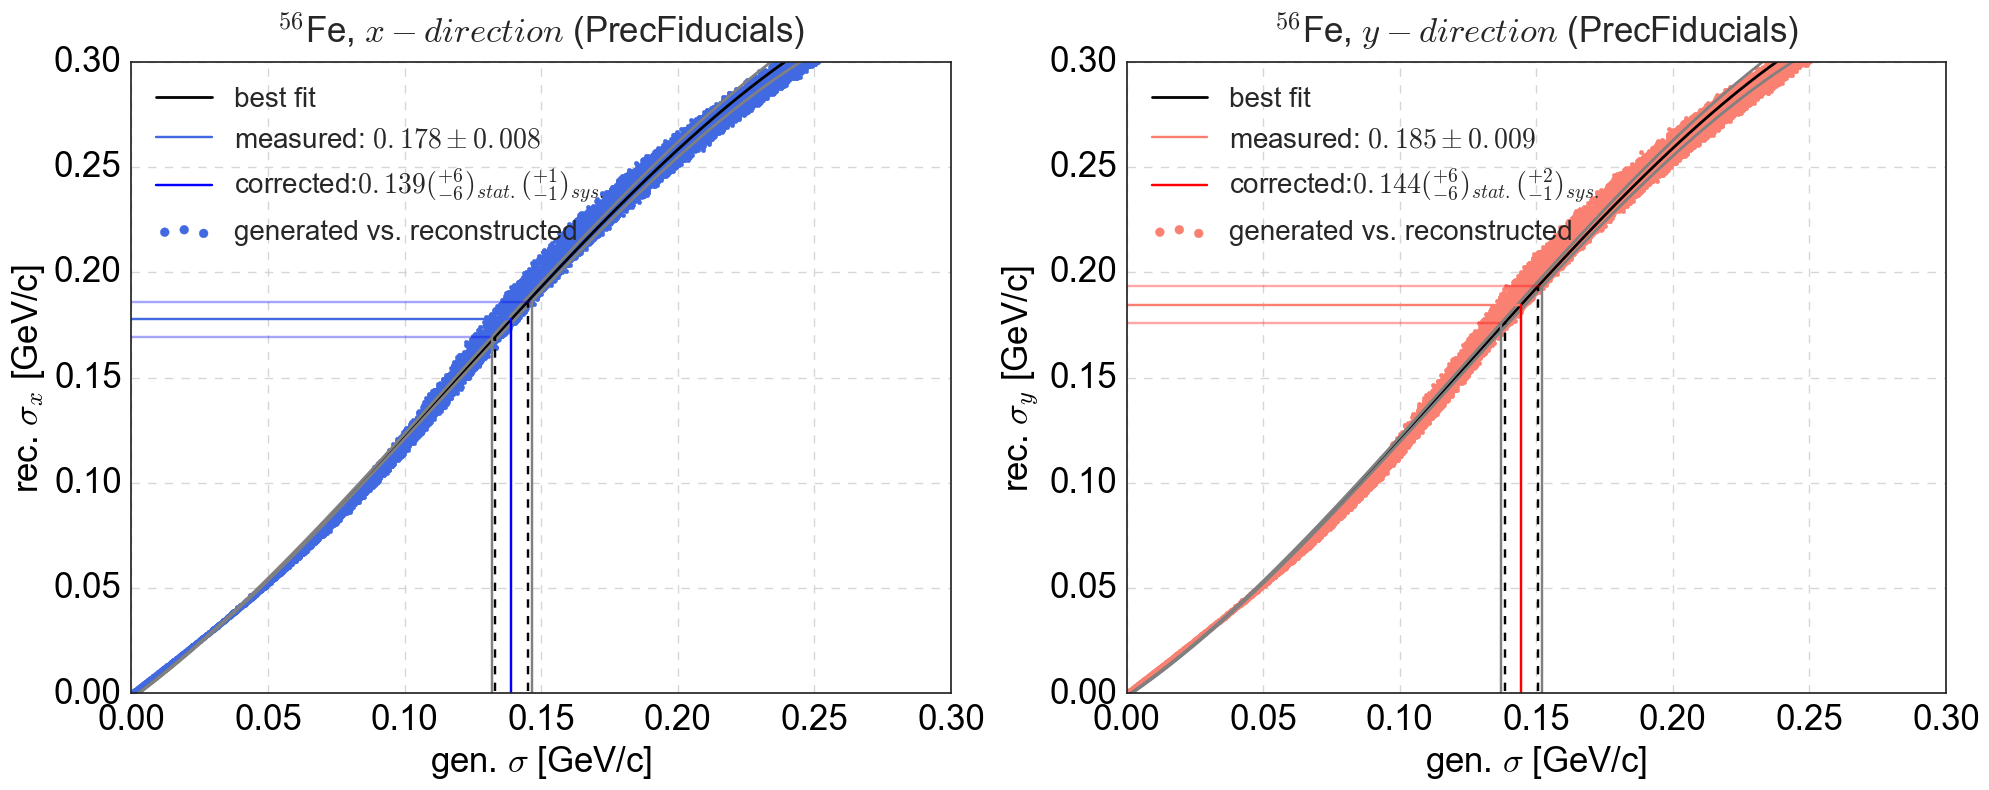

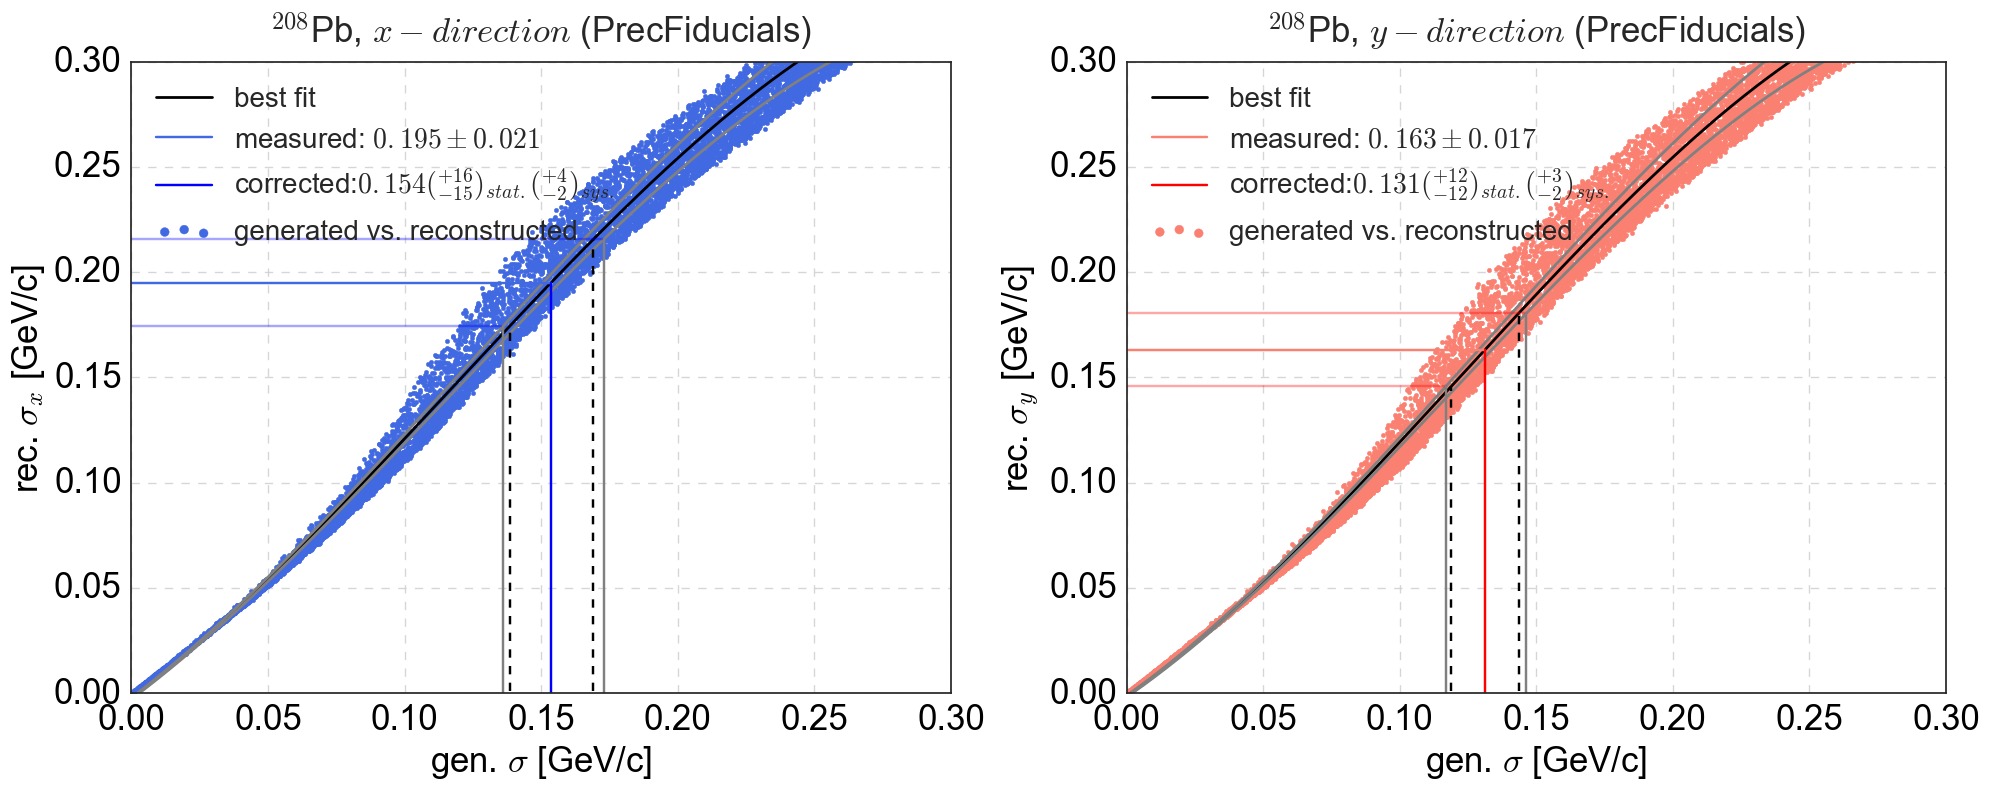

In [19]:
poly_degree = 3 # fit polynomial degree
confidence_interval = 0.68 # band around fit
Fiducials = "PrecFiducials"
for extraname in ["fixed_meanZmeasured","fixed_meanZ03"]:
    for A,target in zip([12,27,56,208],['C','Al','Fe','Pb']):
        test_name = "sims_300Pmiss600_"+target+"_"+Fiducials+extraname
        simulations_results=simulation_results[test_name]
        good_results = simulations_results[(simulations_results['gen_SigmaZ']>0)
                                           &(simulations_results['rec_sigma_x']>0)
                                           &(simulations_results['rec_sigma_y']>0)                                                                                    
                                           &(simulations_results['rec_sigma_z']>0)
                                           &(simulations_results['rec_mean_x']>-0.9)
                                           &(simulations_results['rec_mean_y']>-0.9)                                                                                   
                                           &(simulations_results['rec_mean_x']>-0.9)
                                          ]
        fig=plt.figure(figsize=(20,8))    
        ax=fig.add_subplot(1,2,1)    
        corr_sx = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials,extraname=extraname                                                    
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='x'                                                           
                                                           ,colors=['blue','royalblue']);

        ax=fig.add_subplot(1,2,2)    
        corr_sx = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials,extraname=extraname                                                                                                                                                                             
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='y'                                                           
                                                           ,colors=['red','salmon']);                        
    
        plt.tight_layout()           

In [20]:
Fiducials = "PrecFiducials"
sample = cm_parameters_with_correction[Fiducials]
for extraname in ["fixed_meanZmeasured","fixed_meanZ03"]:
    for direction in ['x','y']:
        sample['sigma_'+direction+extraname+'_final'] = sample['sigma_'+direction+'_corrected'+extraname]
        for updw in ['up','dw']:
            sample['sigma_'+direction+extraname+'_final_'+updw+'_err_tot'] = sample['sigma_'+direction+'_corrected_'+updw+'_err_tot'+extraname]
            sample['sigma_'+direction+extraname+'_final_'+updw+'_err'] = sample['sigma_'+direction+extraname+'_final_'+updw+'_err_tot']

    sample['sigma_t'+extraname+'_corrected'] = 0.5*(sample['sigma_x_corrected'+extraname]+sample['sigma_y_corrected'+extraname])
    sample['sigma_t'+extraname+'_final'] = 0.5*(sample['sigma_x_corrected'+extraname]+sample['sigma_y_corrected'+extraname])

    for err_label in ['stat','sys','tot']:
        for updw in ['up','dw']:
            sample['sigma_t'+extraname+'_final_'+updw+'_err_'+err_label] = 0.5*np.sqrt(np.square(sample['sigma_x_corrected_'+updw+'_err_'+err_label+extraname])                                                                         
                                                                                       +np.square(sample['sigma_y_corrected_'+updw+'_err_'+err_label+extraname]))
    for updw in ['up','dw']:
        sample['sigma_t'+extraname+'_final_'+updw+'_err'] = sample['sigma_t'+extraname+'_final_'+updw+'_err_tot']

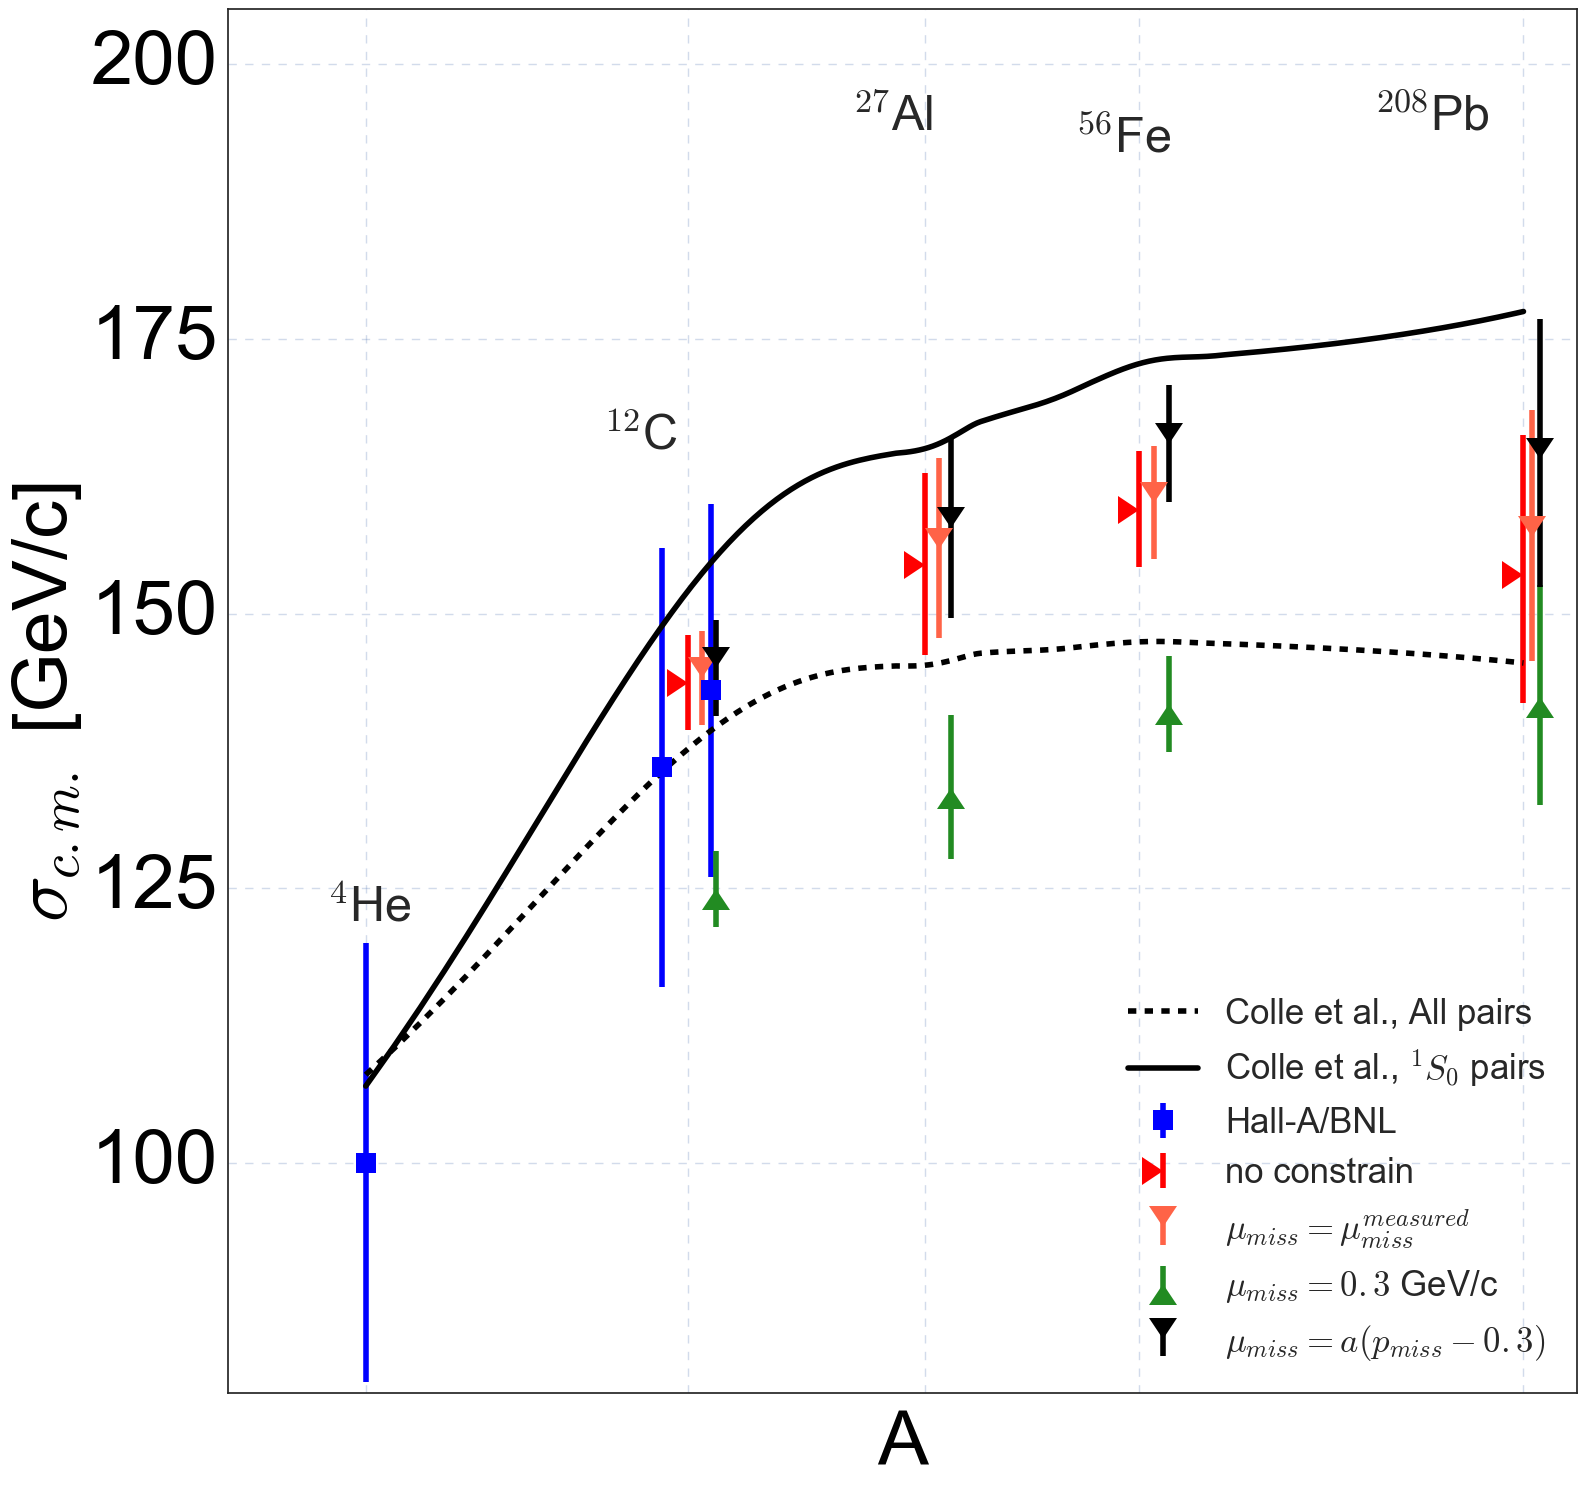

In [25]:
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,194),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(125,194), }),do_Ciofi=False)

for i,(extraname,label,marker,color) in enumerate(zip(["","fixed_meanZmeasured","fixed_meanZ03"]
                                        ,['no constrain','$\\mu_{miss}=\\mu_{miss}^{measured}$','$\\mu_{miss}=0.3$ GeV/c']
                                        ,[5,7,6]
                                        ,['red','tomato','forestgreen'])):
    plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'], ax=ax
                         ,Ashift=np.array([1.2,2.5,6,12])*i*0.5
                         ,direction='t'+extraname, label=label,color=color,markersize=20 , marker=marker )
extraname="_MeanZlinearInPmiss_SigmaZ5stdSroundMeasured"
plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'], ax=ax,Ashift=[1.2,2.5,6,12] ,direction='t'+extraname, label='$\\mu_{miss}=a(p_{miss}-0.3)$',color='black',markersize=20 , marker=7 )

ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()

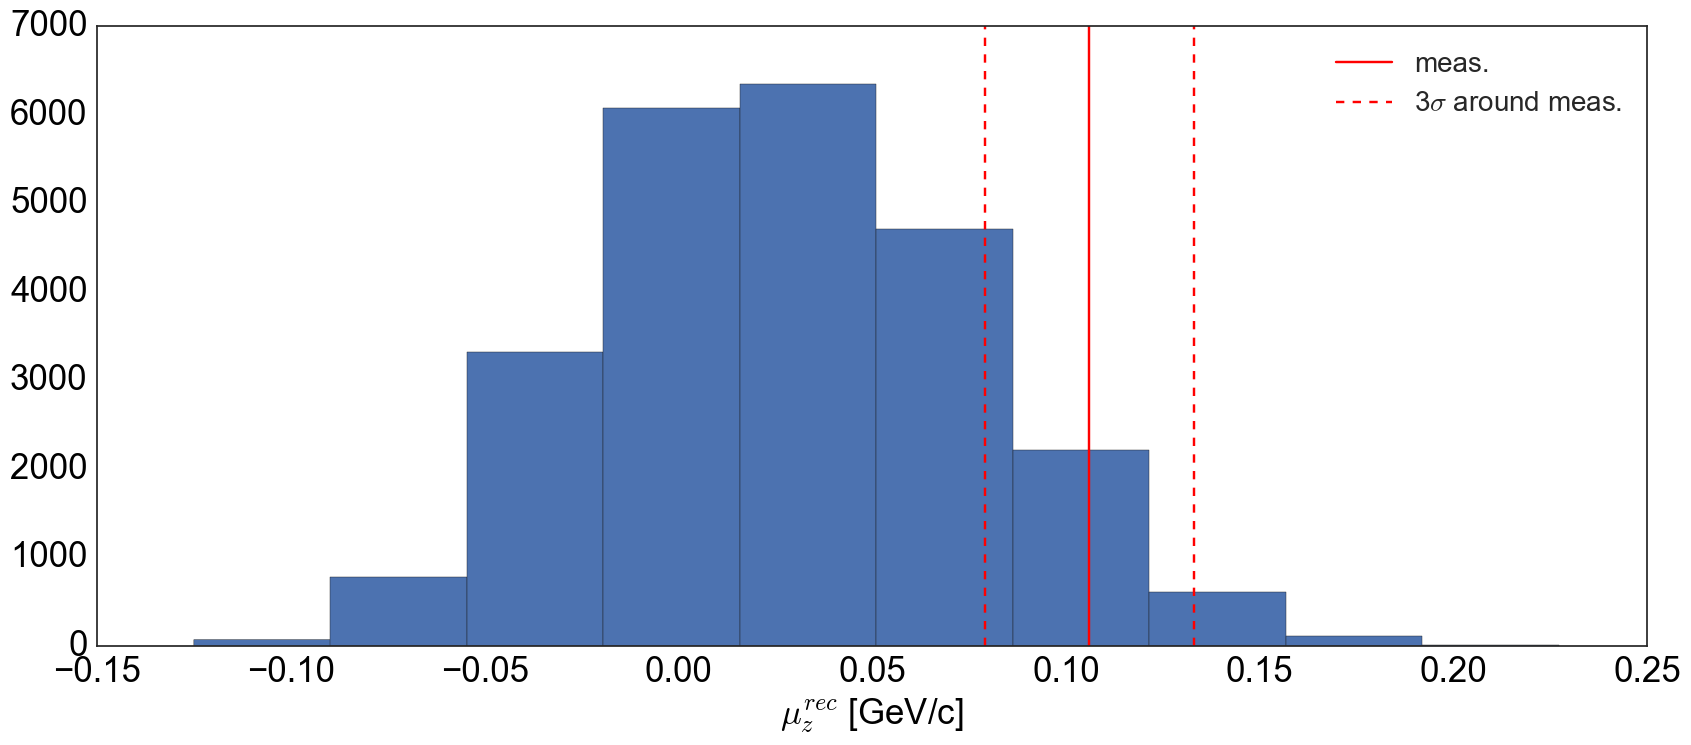

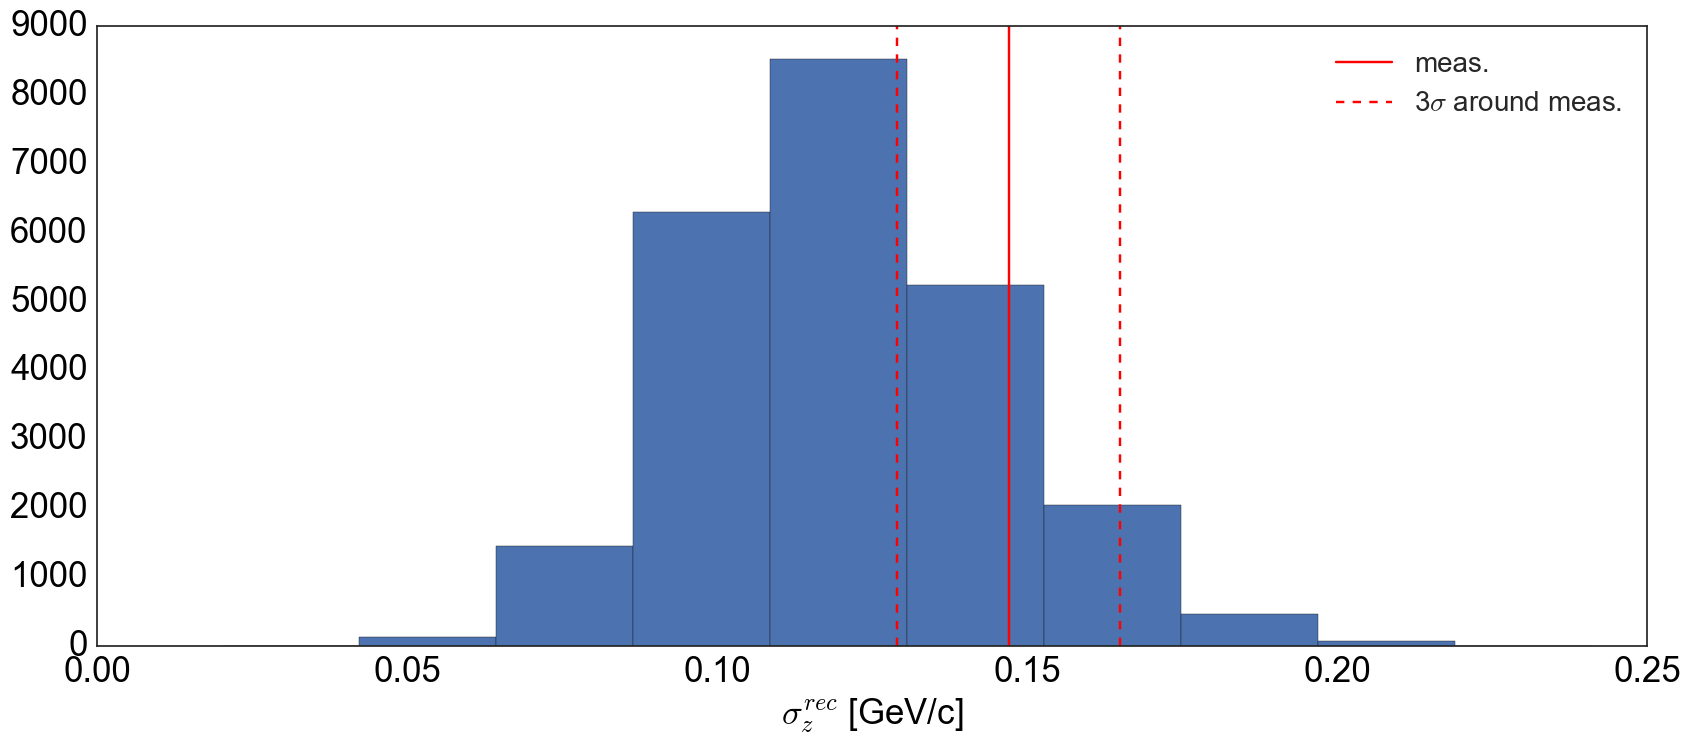

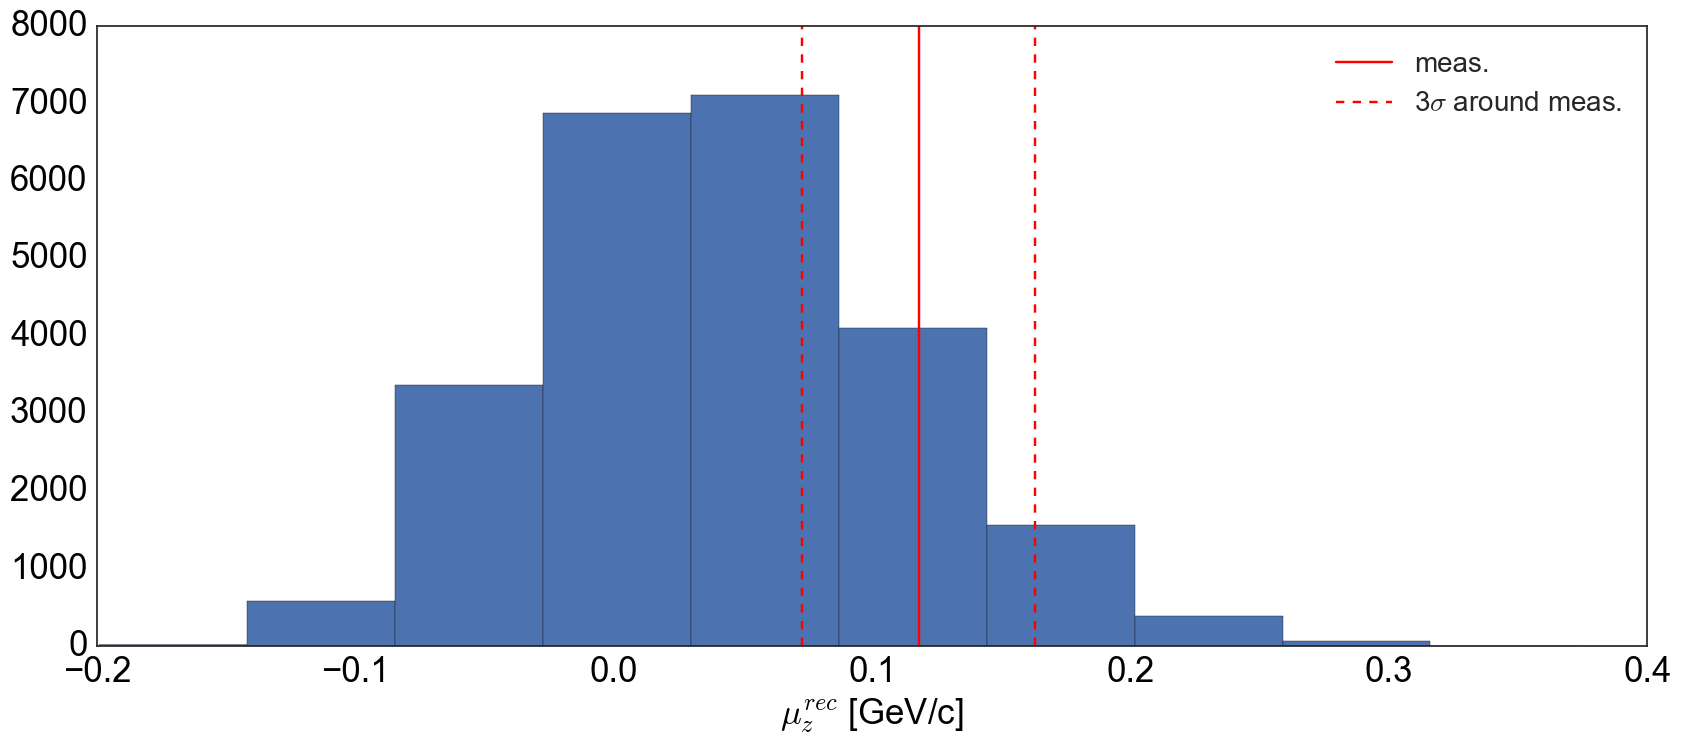

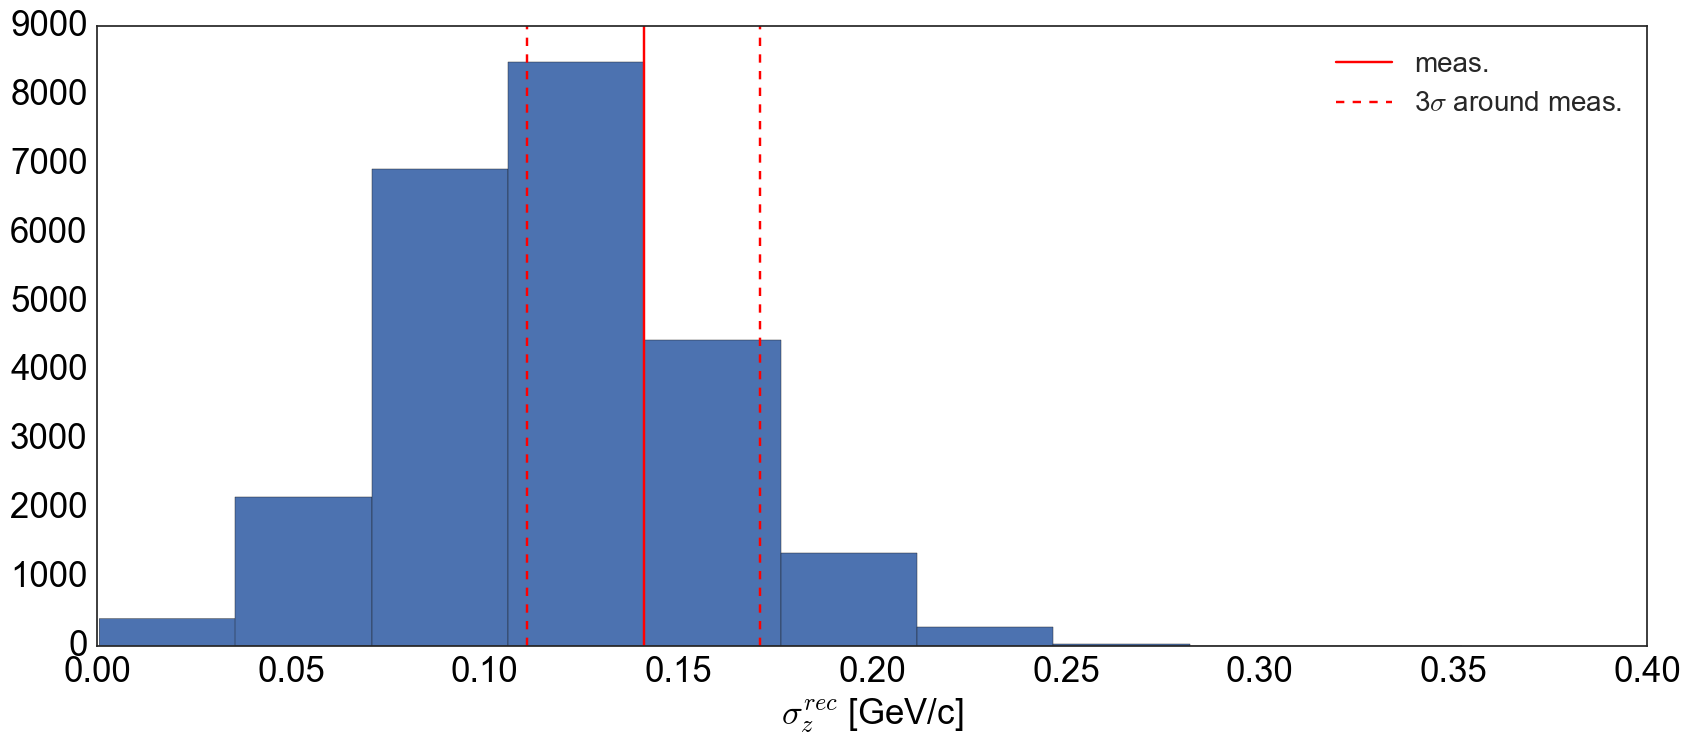

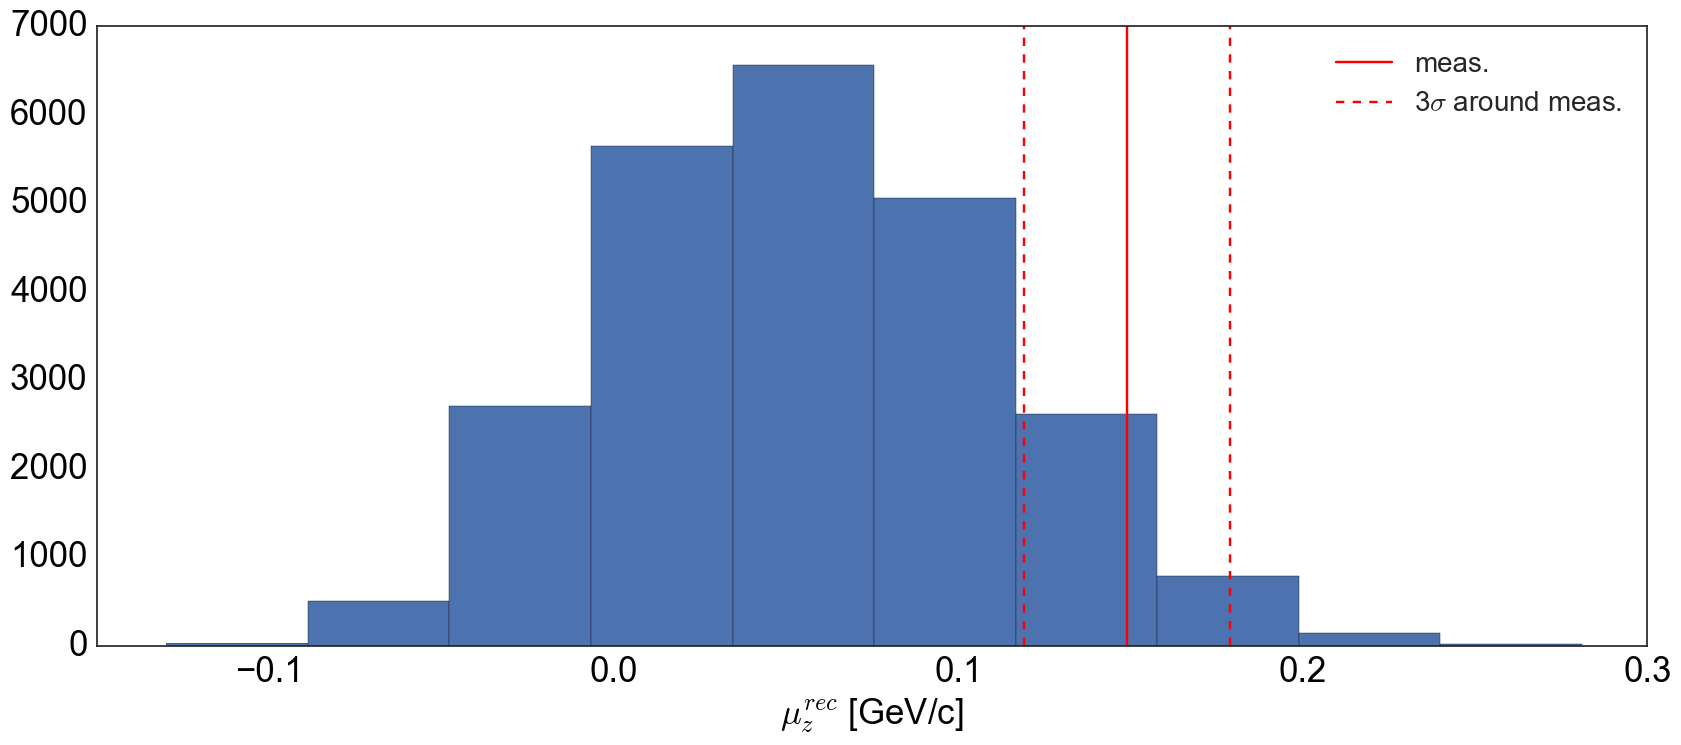

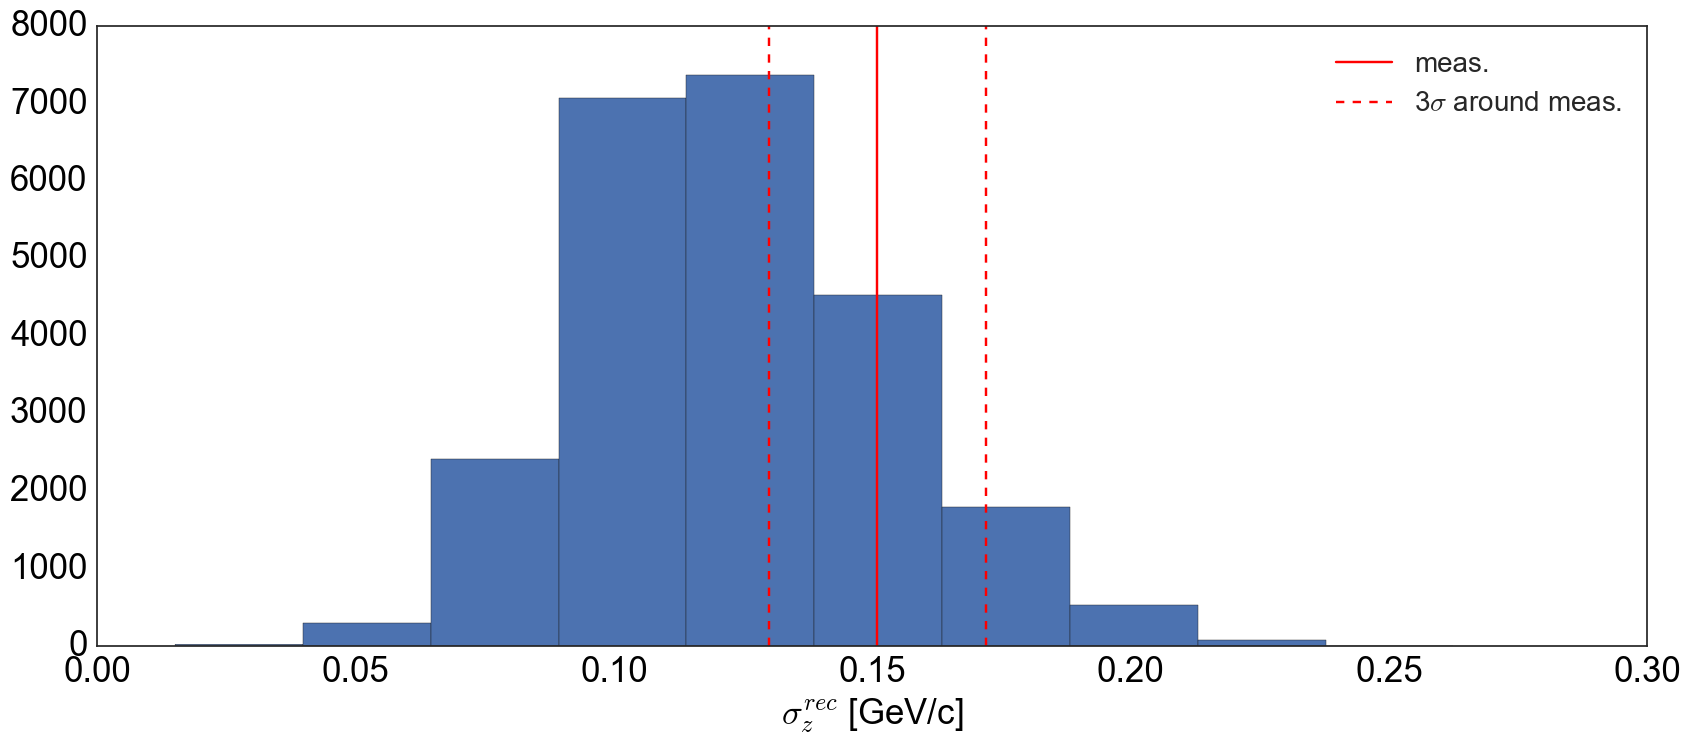

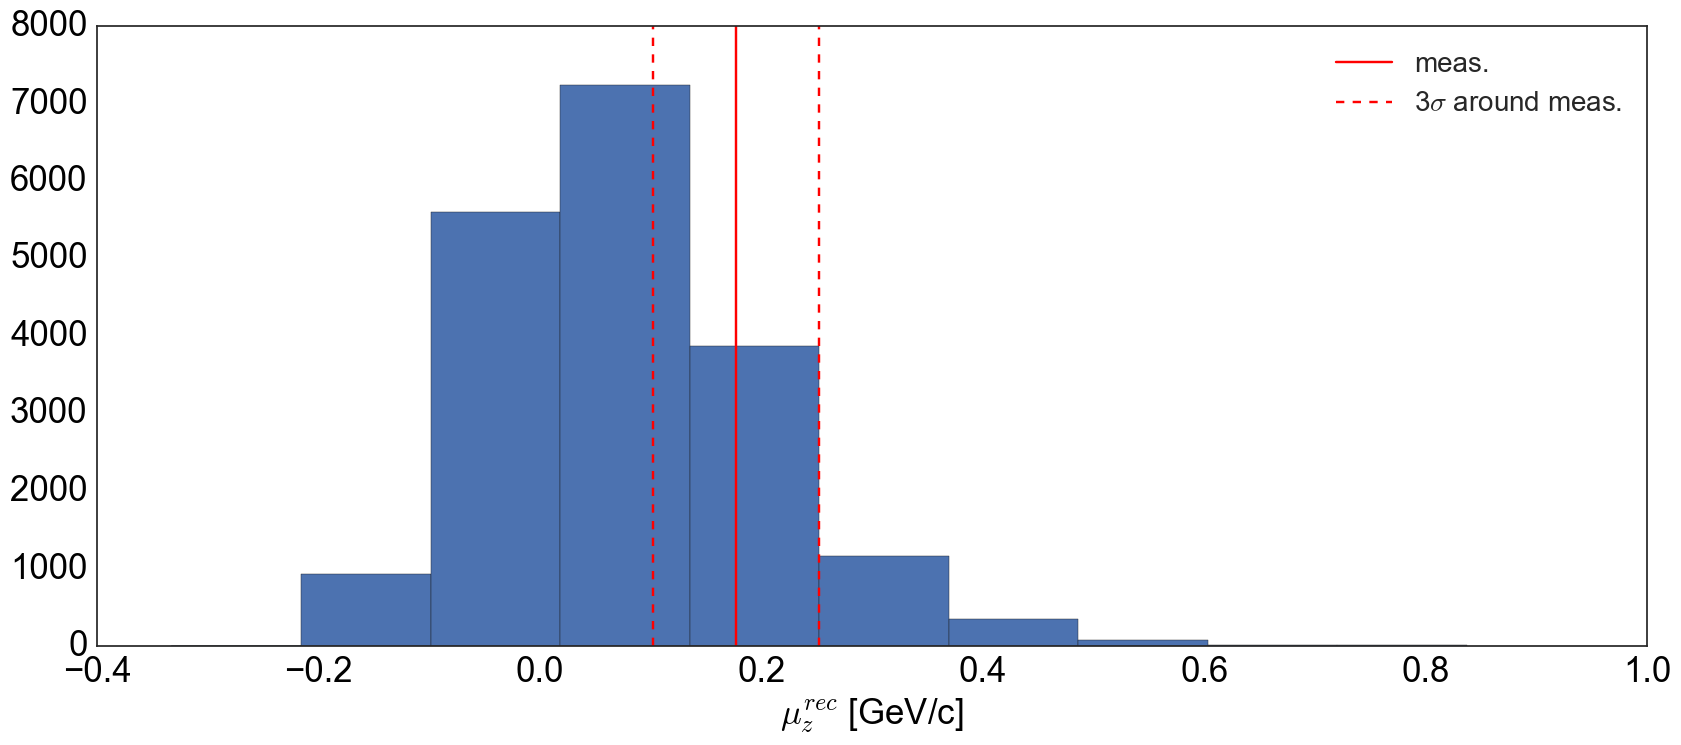

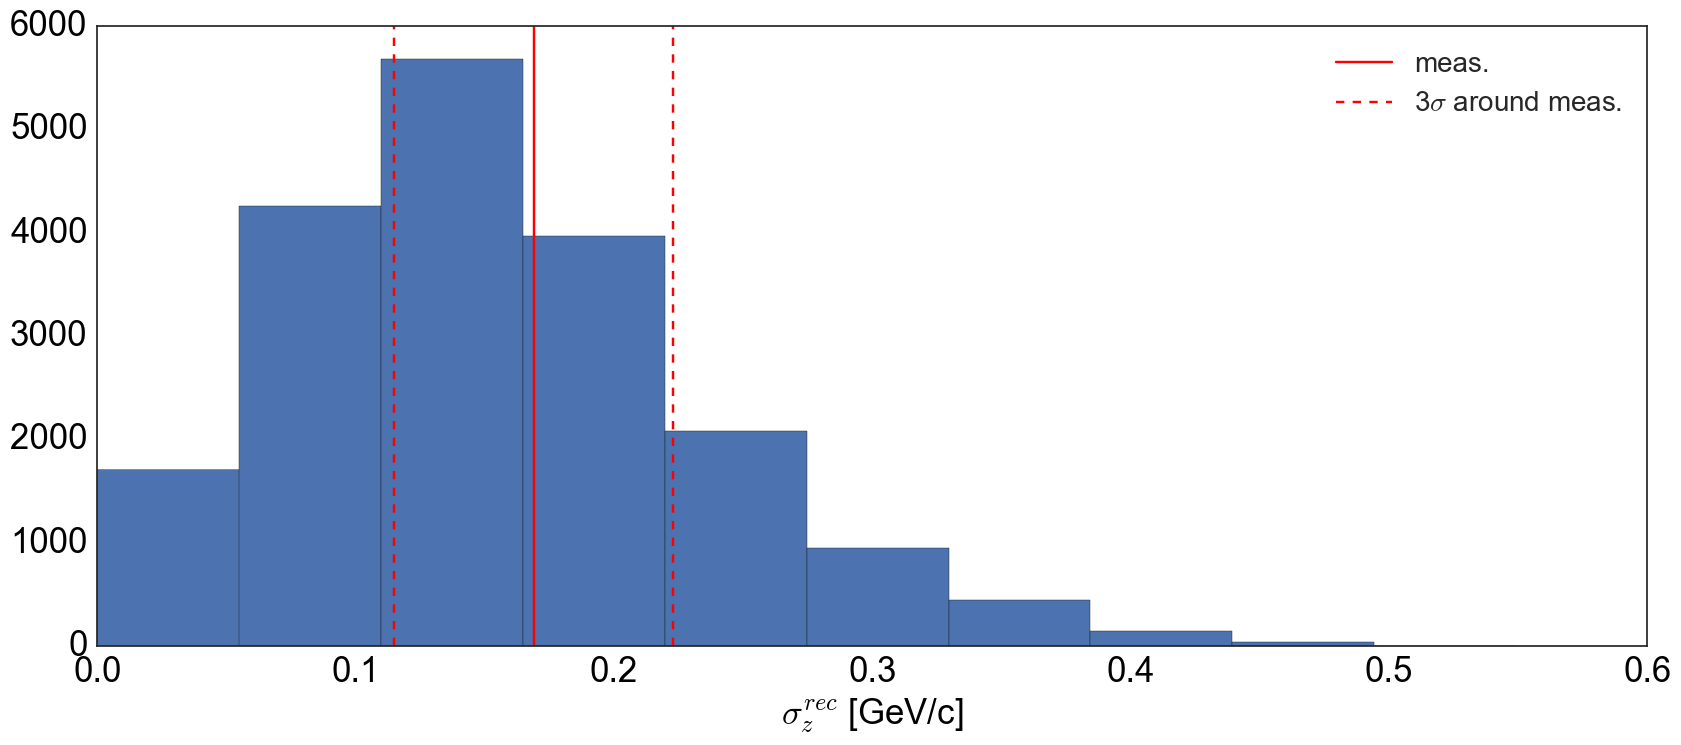

In [22]:
poly_degree = 3 # fit polynomial degree
confidence_interval = 0.68 # band around fit
Fiducials = "PrecFiducials"
measured_mean_z     = [0.106,0.118,0.149,0.177]
measured_mean_z_err = [0.009,0.015,0.010,0.025]
measured_sigma_z    = [0.147,0.141,0.151,0.169]
measured_sigma_z_err= [0.006,0.010,0.007,0.018]


for A,target,meas_mean_z,meas_mean_z_err,meas_sigma_z,meas_sigma_z_err in zip([12,27,56,208]
                                                                                  ,['C','Al','Fe','Pb']
                                                                                  ,measured_mean_z,measured_mean_z_err,measured_sigma_z,measured_sigma_z_err):
    test_name = "sims_300Pmiss600_"+target+"_"+Fiducials
    simulations_results=simulation_results[test_name]
    good_results = simulations_results[(simulations_results['gen_SigmaZ']>0)
                                           &(simulations_results['rec_sigma_x']>0)
                                           &(simulations_results['rec_sigma_y']>0)                                                                                    
                                           &(simulations_results['rec_sigma_z']>0)
                                           &(simulations_results['rec_mean_x']>-0.9)
                                           &(simulations_results['rec_mean_y']>-0.9)                                                                                   
                                           &(simulations_results['rec_mean_x']>-0.9)
                                          ]
    fig,ax=plt.subplots(figsize=(20,8))    
    plt.hist(good_results['rec_mean_z'])
    plt.plot([meas_mean_z,meas_mean_z],ax.get_ylim(),'-',color='red',label='meas.')
    plt.plot([meas_mean_z+3*meas_mean_z_err,meas_mean_z+3*meas_mean_z_err],ax.get_ylim(),'--',color='red',label='3$\\sigma$ around meas.')
    plt.plot([meas_mean_z-3*meas_mean_z_err,meas_mean_z-3*meas_mean_z_err],ax.get_ylim(),'--',color='red')
    set_axes(ax,'$\\mu_z^{rec}$ [GeV/c]')
    ax.legend(fontsize=20)
    
    fig,ax=plt.subplots(figsize=(20,8))    
    plt.hist(good_results['rec_sigma_z'])
    plt.plot([meas_sigma_z,meas_sigma_z],ax.get_ylim(),'-',color='red',label='meas.')
    plt.plot([meas_sigma_z+3*meas_sigma_z_err,meas_sigma_z+3*meas_sigma_z_err],ax.get_ylim(),'--',color='red',label='3$\\sigma$ around meas.')
    plt.plot([meas_sigma_z-3*meas_sigma_z_err,meas_sigma_z-3*meas_sigma_z_err],ax.get_ylim(),'--',color='red')
    set_axes(ax,'$\\sigma_z^{rec}$ [GeV/c]')
    ax.legend(fontsize=20)    

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/erezcohen/Library/Python/2.7/lib/python/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:55: ComplexWarning: Casting complex values to real discards the imaginary part


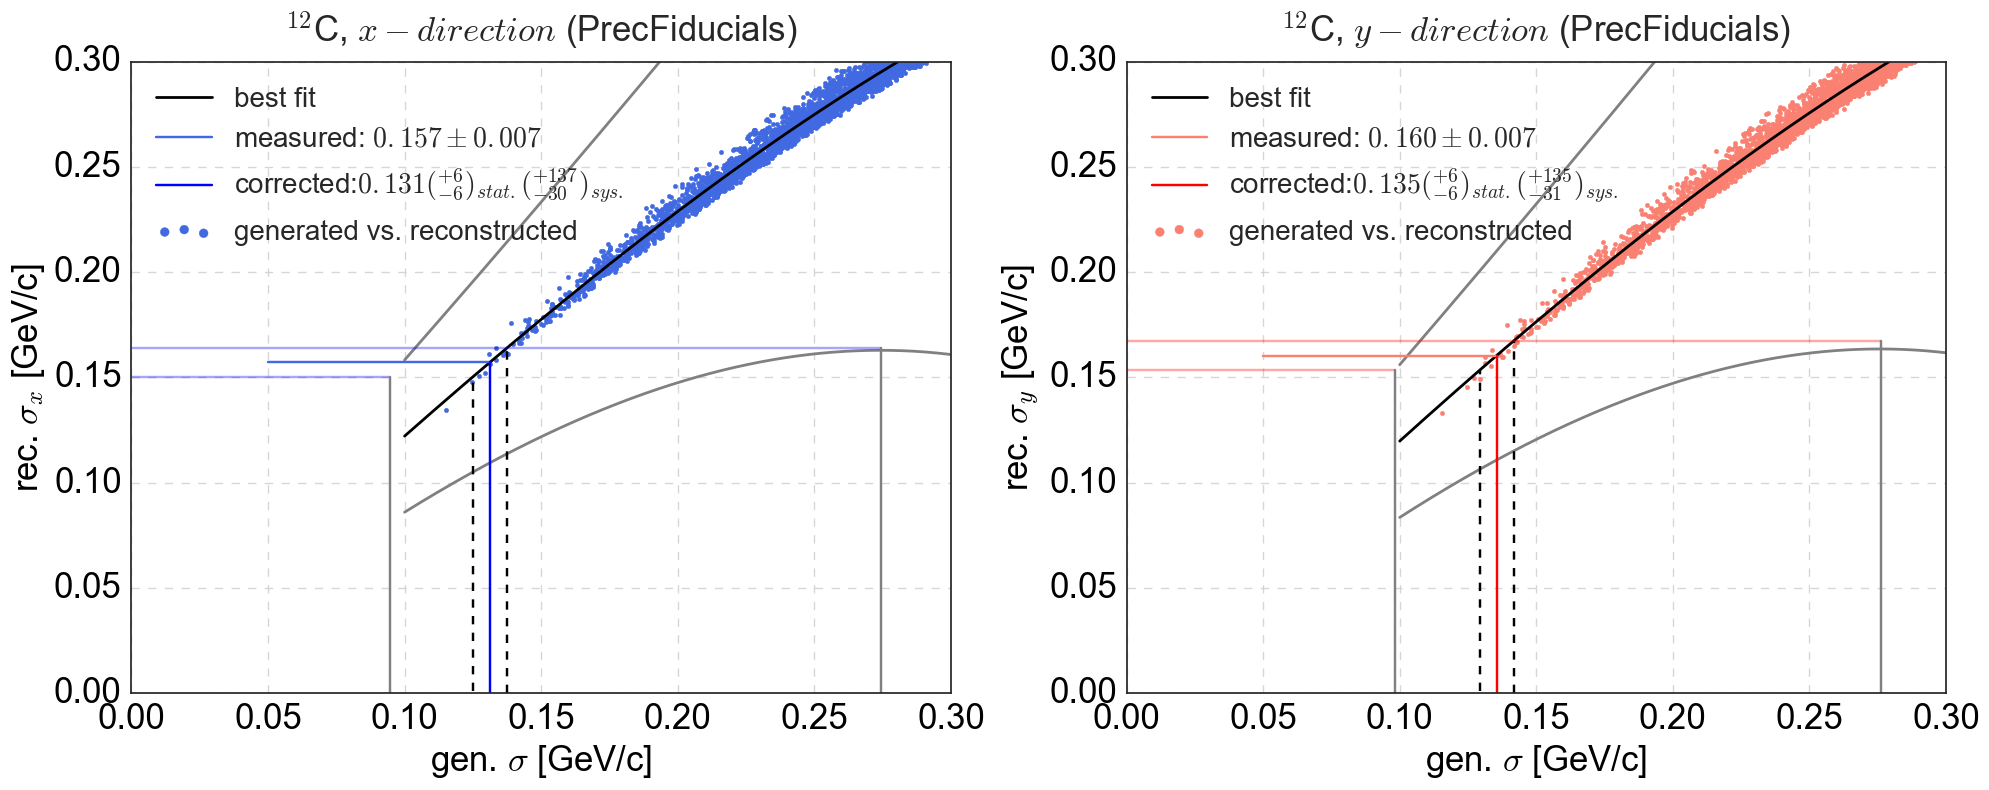

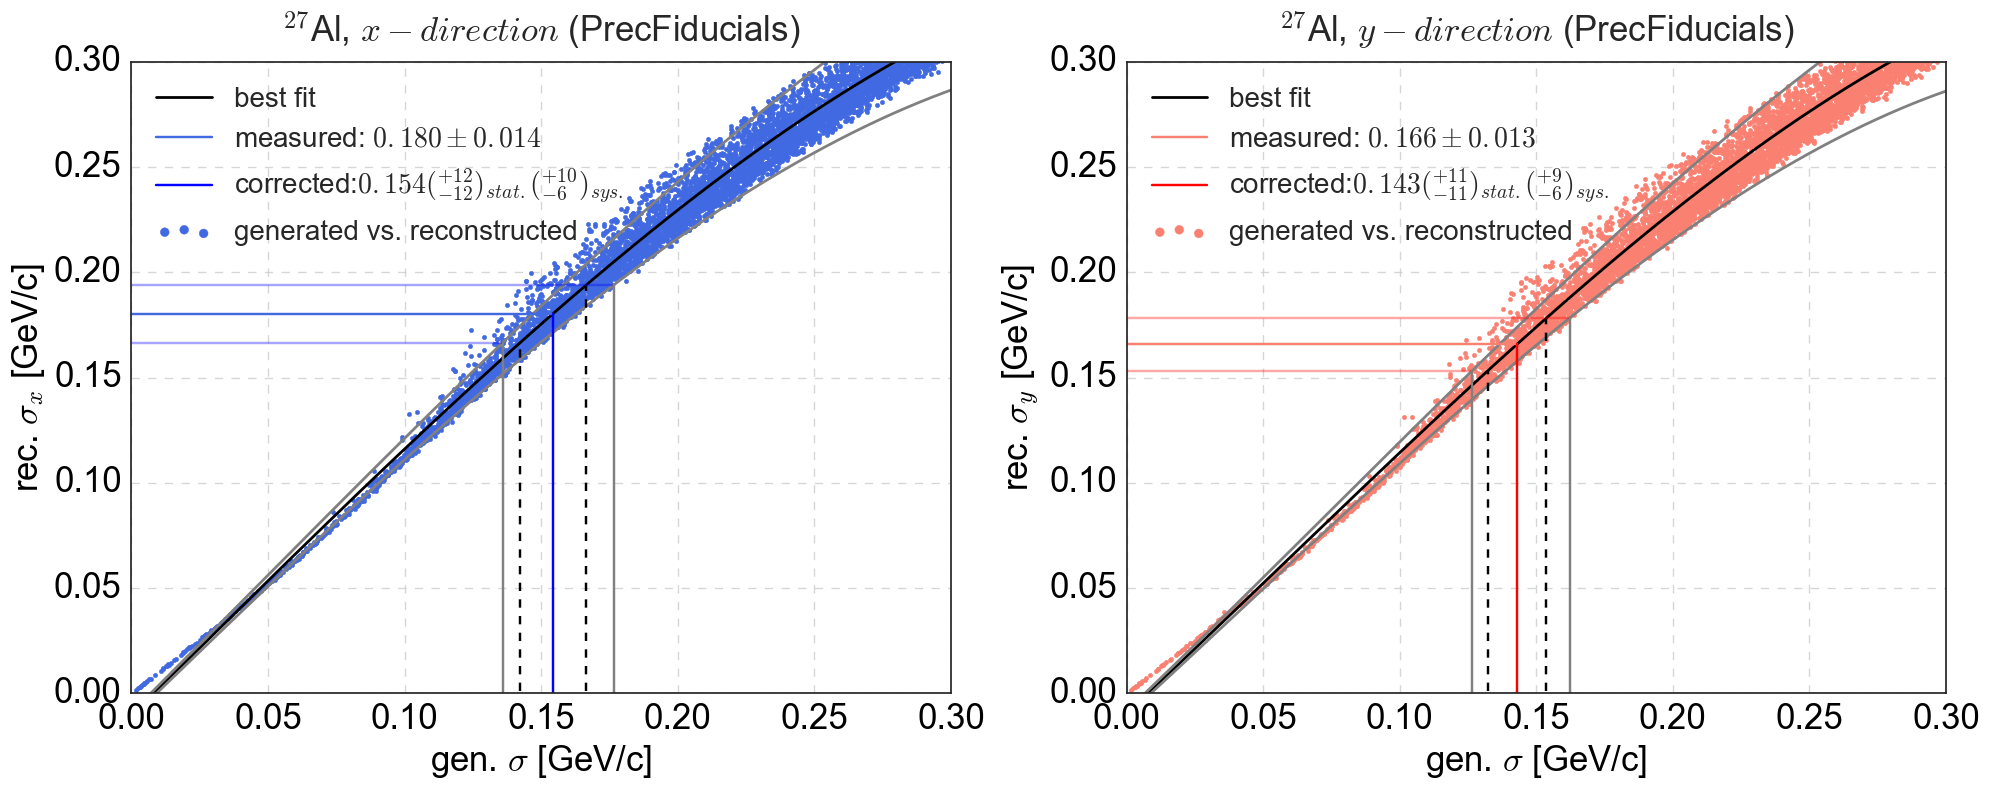

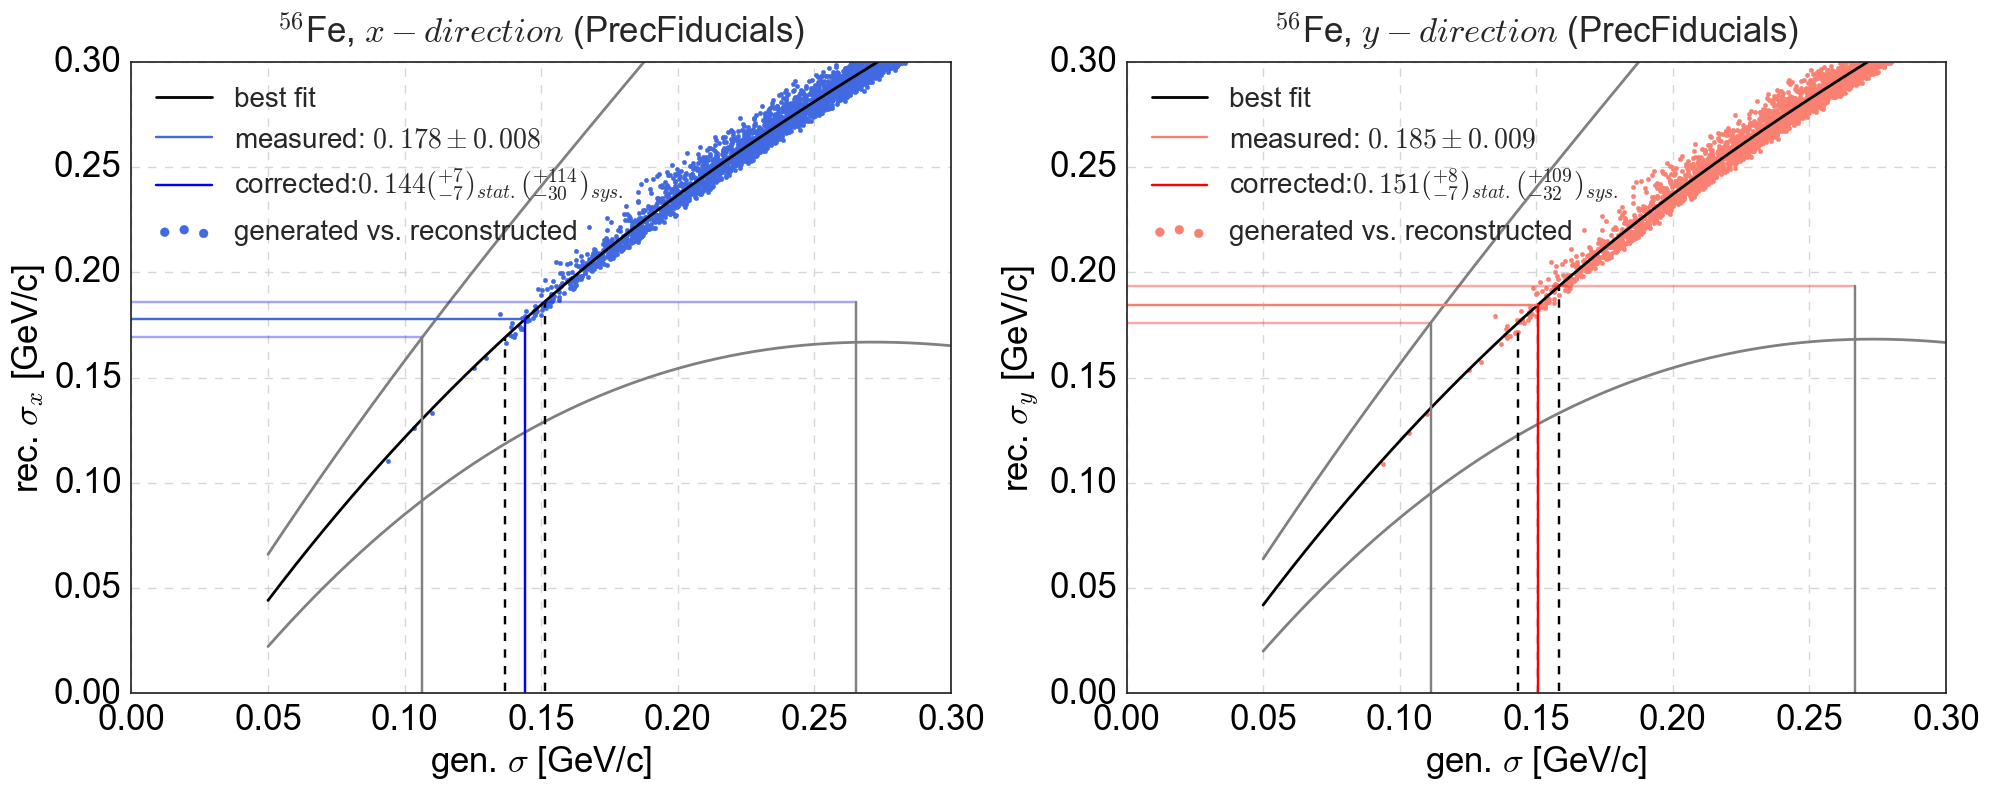

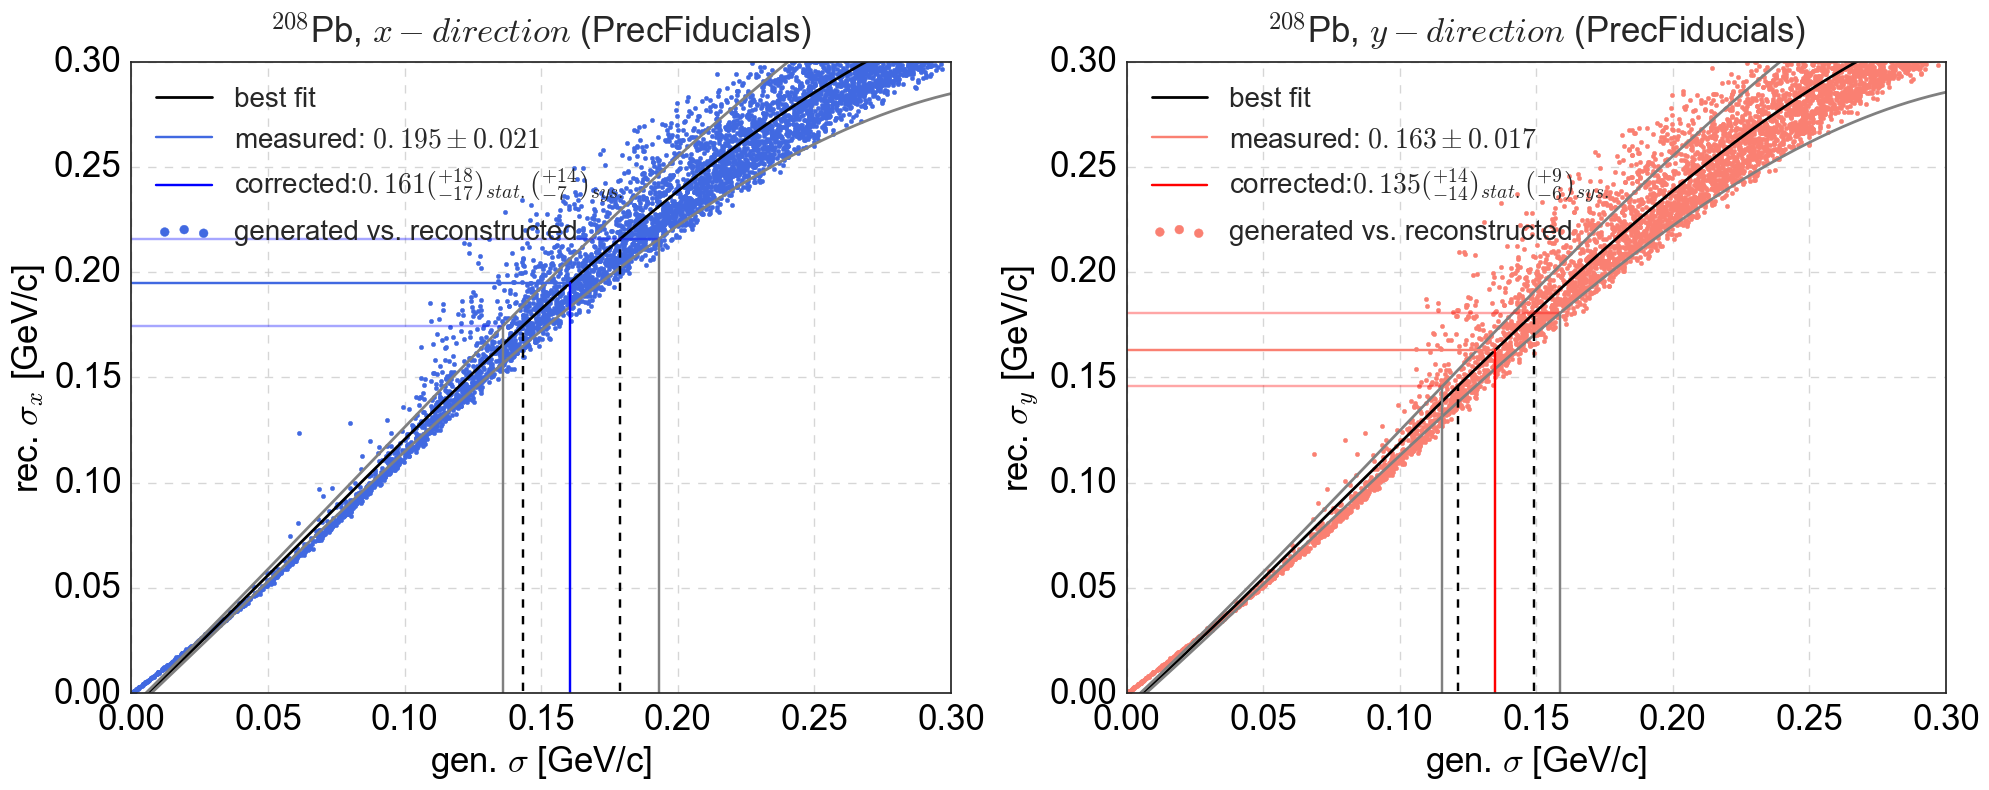

In [23]:
poly_degree = 3 # fit polynomial degree
confidence_interval = 0.68 # band around fit

for Fiducials in ["PrecFiducials"]:#,"NoPrecFiducials"]: 
    for A,target,meas_mean_z,meas_mean_z_err,meas_sigma_z,meas_sigma_z_err,Neep,Neepp in zip([12,27,56,208]
                                   ,['C','Al','Fe','Pb']
                                   ,measured_mean_z,measured_mean_z_err,measured_sigma_z,measured_sigma_z_err
                                                                                  ,[7598,2573,8558,2635]
                                                                                  ,[266,88,227,45]
                       ):#{
        test_name = "sims_300Pmiss600_"+target+"_"+Fiducials
        simulations_results=simulation_results[test_name]
        good_results = simulations_results[(simulations_results['gen_SigmaZ']>0)
                                           &(simulations_results['rec_sigma_x']>0)
                                           &(simulations_results['rec_sigma_y']>0)                                                                                    
                                           &(simulations_results['rec_sigma_z']>0)
                                           &(simulations_results['rec_mean_x']>-0.9)
                                           &(simulations_results['rec_mean_y']>-0.9)                                                                                   
                                           &(simulations_results['rec_mean_x']>-0.9)

                                           &(simulations_results['rec_mean_z']>(meas_mean_z-5*meas_mean_z_err))
                                           &(simulations_results['rec_mean_z']<(meas_mean_z+5*meas_mean_z_err))

                                           &(simulations_results['rec_sigma_z']>(meas_sigma_z-5*meas_sigma_z_err))
                                           &(simulations_results['rec_sigma_z']<(meas_sigma_z+5*meas_sigma_z_err))

                                          ]
        fig=plt.figure(figsize=(20,8))
    
        ax=fig.add_subplot(1,2,1)    
#         plt.hist(100.*good_results['Naccepted']/(20*(Neep+Neepp)))
#         set_axes(ax,'f(acceptance) [%]')
        corr_sx = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials                                                           
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='x'                                                           
                                                           ,colors=['blue','royalblue']);

        ax=fig.add_subplot(1,2,2)    
        corr_sx = plot_cm_direction(simulations_results=good_results
                                                           ,Fiducials=Fiducials                                                                                                                                                                                 
                                                           ,ax=ax,s=10                                                           
                                                           ,poly_degree=poly_degree,confidence_interval=confidence_interval                                                           
                                                           ,A=A,direction='y'                                                           
                                                           ,colors=['red','salmon']);                        
    
        plt.tight_layout()   